In [84]:
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px
import plotly.io as pio
import plotly
from scipy import signal
import math
import os

os.chdir(r'E:\桌面\建投工作文件\库存周期')
plotly.offline.init_notebook_mode(connected=True)

pio.renderers.default = "png"
pio.renderers["png"].width = 1200  # 使用png渲染器并设置分辨率
pio.renderers["png"].height = 500

# 准备数据

In [13]:
def detrend(seriesLike):
    notna = seriesLike[seriesLike.notna()]
    seriesLike[seriesLike.notna()] = signal.detrend(notna.values, type='linear')
    return seriesLike

def economic_data(source, sheet_name):
    data = pd.read_excel(source, sheet_name=sheet_name, header=0, index_col=0,
                         parse_dates=True, engine='openpyxl').fillna(method='ffill').dropna(how='all')
    data.index = data.index.map(lambda x: x.replace(day=15))
    return data

def stock_data(source, sheet_name):
    data = pd.read_excel(source, sheet_name=sheet_name, header=0, index_col=0, parse_dates=True, engine='openpyxl'
                        ).fillna(method='ffill').dropna(how='all').resample('SMS').last() # 选择每月15号的数据，如果15号是非交易日就提前
    data = data[data.index.day == 15]  #.apply(detrend, axis=0)
    return data

In [14]:
ppi =economic_data('CEIC宏观数据.xlsx', 'PPI')
income = economic_data('CEIC宏观数据.xlsx', '营业收入')
stock = economic_data('CEIC宏观数据.xlsx', '产成品库存')

inc_stk = (income - stock).dropna(how='all')
print(income.columns)

Index(['全部工业', '煤炭开采和洗选业', '石油和天然气开采业', '黑色金属矿采选业', '有色金属矿采选业', '非金属矿采选业',
       '开采专业和辅助性活动', '其他采矿业', '农副食品加工业', '食品制造业', '酒、饮料和精制茶制造业', '烟草制品业',
       '纺织业', '纺织服装、服饰业', '皮革、毛皮、羽毛和其制品和制鞋业', '木材加工和木、竹、藤、棕、草制品业', '家具制造业',
       '造纸和纸制品业', '全部工业.1', '印刷和记录媒介复制业', '文教、工美、体育和娱乐用品制造业', '石油、煤炭和其他燃料加工业',
       '化学原料和化学制品制造业', '医药制造业', '化学纤维制造业', '非金属矿物制品业', '黑色金属冶炼和压延加工业',
       '有色金属冶炼和压延加工业', '金属制品业', '通用设备制造业', '专用设备制造业', '汽车制造业',
       '铁路、船舶、航空航天和其他运输设备制造业', '电气机械和器材制造业', '计算机、通信和其他电子设备制造业', '仪器仪表制造业',
       '其他制造业', '废弃资源综合利用业', '金属制品、机械和设备修理业', '电力、热力生产和供应业', '燃气生产和供应业',
       '水的生产和供应业'],
      dtype='object')


In [15]:
statistic_ind = stock_data('细分行业日度收盘价.xlsx', '证监会二级')  # 数据不能有空列
citic_ind = stock_data('细分行业日度收盘价.xlsx', '中信一级')
print(statistic_ind.columns)
print(citic_ind.columns)

Index(['万得全A', '农副食品加工', '食品制造', '饮料和精制茶制造', '纺织', '纺织服装服饰', '皮革制鞋', '木材加工',
       '家具制造', '造纸和纸制品', '印刷和媒介', '文体用品', '石油炼焦和核燃料', '化学原料和化学制品', '医药制造',
       '化纤制造', '橡胶塑料', '非金属', '黑色金属', '有色金属', '金属制品', '通用设备', '专用设备', '汽车制造',
       '运输设备制造', '电气机械和器材制造', '计算机通信和电子设备', '仪器仪表', '其他制造业', '农业', '林业', '畜牧',
       '渔业', '农林牧渔服务', '煤炭开采和洗选', '石油天然气开采', '黑色金属矿采选', '有色金属矿采选', '开采辅助活动',
       '电热生产供应', '燃气生产供应', '水生产供应', '房屋建筑', '土木工程建筑', '建筑安装', '建筑装饰', '批发',
       '零售', '铁路运输', '道路运输', '水上运输', '航空运输', '管道运输', '装卸搬运和运输代理', '仓储', '住宿',
       '餐饮', '电信广电卫星', '互联网服务', '软件信息技术服务', '货币金融服务', '资本市场服务', '保险', '其他金融',
       '租赁', '商务服务', '研究试验发展', '专业技术服务', '科技推广应用服务', '生态环保和治理', '公共设施管理', '卫生',
       '社会工作', '新闻出版', '广电影视录音制作', '文化艺术', '废弃资源综合利用', '邮政', '机动车和电子日用品修理',
       '体育', '非金属矿采选'],
      dtype='object')
Index(['万得全A', '石油石化', '煤炭', '有色金属', '电力及公用事业', '钢铁', '基础化工', '建筑', '建材',
       '轻工制造', '机械', '电力设备及新能源', '国防军工', '汽车', '商贸零售', '消费者服务', '家电', '纺织服装',
       '医药', '食品饮料', '农林牧渔',

# PPI分析

### PPI图形分析

In [16]:
period_data = pd.read_excel('period_data.xlsx', index_col=0, engine='openpyxl')

In [47]:
def basic_compare(dataname, citic=True, alpha=True):
    ppi_up = make_subplots()
    ppi_down = make_subplots()
    
    if citic:
        base = citic_ind['万得全A']
        data = citic_ind[dataname]
    else:
        base = statistic_ind['万得全A']
        data = statistic_ind[dataname]
    
    avg_up, avg_down = 0, 0
    mon_up, mon_down = 0, 0
    count_up, count_down = 0, 0
    
    for index, row in period_data.iterrows():
        data_tmp = data.truncate(after=row['end'], before=row['start']).dropna().reset_index(drop=True)
        base_tmp = base.truncate(after=row['end'], before=row['start']).dropna().reset_index(drop=True)
        
        if len(data_tmp) < 3:
            continue
            
        if alpha:
            type_ = '超额'
            tmp = data_tmp / data_tmp.iloc[0] - base_tmp / base_tmp.iloc[0]
        else:
            type_ = '非超额'
            tmp = data_tmp / data_tmp.iloc[0] - 1
            
        if row['signal'] == 1:
            avg_up += tmp.iloc[-1]
            mon_up += tmp.shape[0]
            count_up += 1
            ppi_up.add_trace(go.Scatter(x=tmp.index, y=tmp, showlegend=True, name=str(row['start'])+' '+str(row['end'])))
        elif row['signal'] == -1:
            avg_down += tmp.iloc[-1]
            mon_down += tmp.shape[0]
            count_down += 1
            ppi_down.add_trace(go.Scatter(x=tmp.index, y=tmp, showlegend=True, name=str(row['start'])+' '+str(row['end'])))
            
    ppi_up.add_trace(go.Scatter(x=[0, mon_up/count_up], y=[0, avg_up/count_up], showlegend=True, name='均值'))
    ppi_down.add_trace(go.Scatter(x=[0, mon_down/count_down], y=[0, avg_down/count_up], showlegend=True, name='均值'))
    
    ppi_up.update_layout(title={'text': 'PPI上行'+' '+dataname+' '+type_})
    ppi_down.update_layout(title={'text': 'PPI下行'+' '+dataname+' '+type_})
    
    ppi_up.show()
    ppi_down.show()

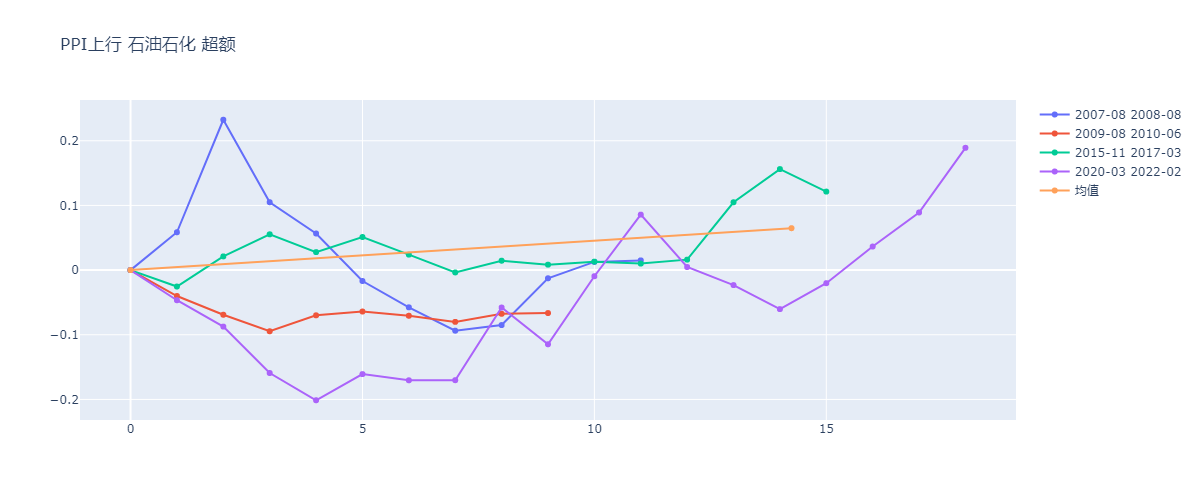

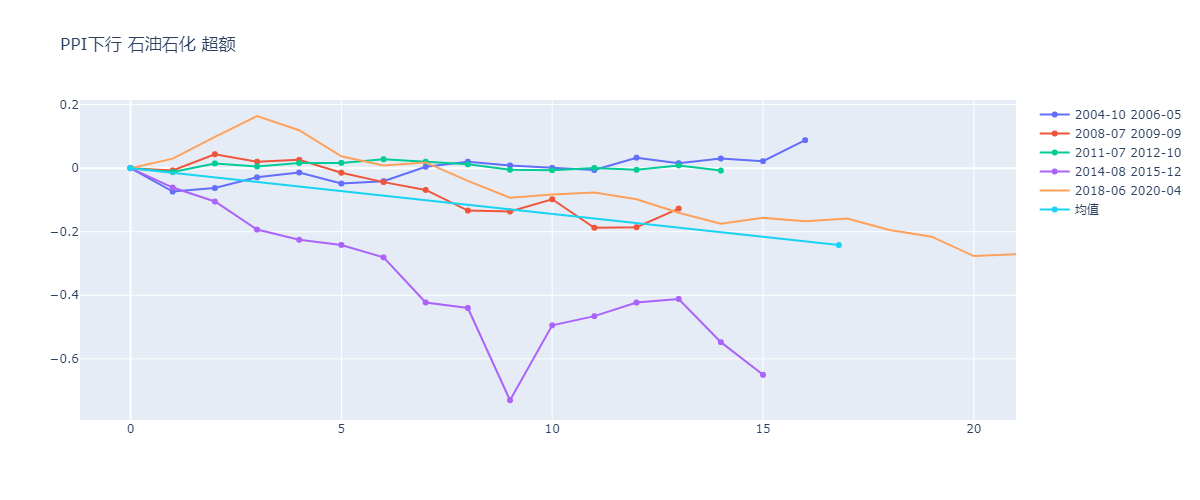

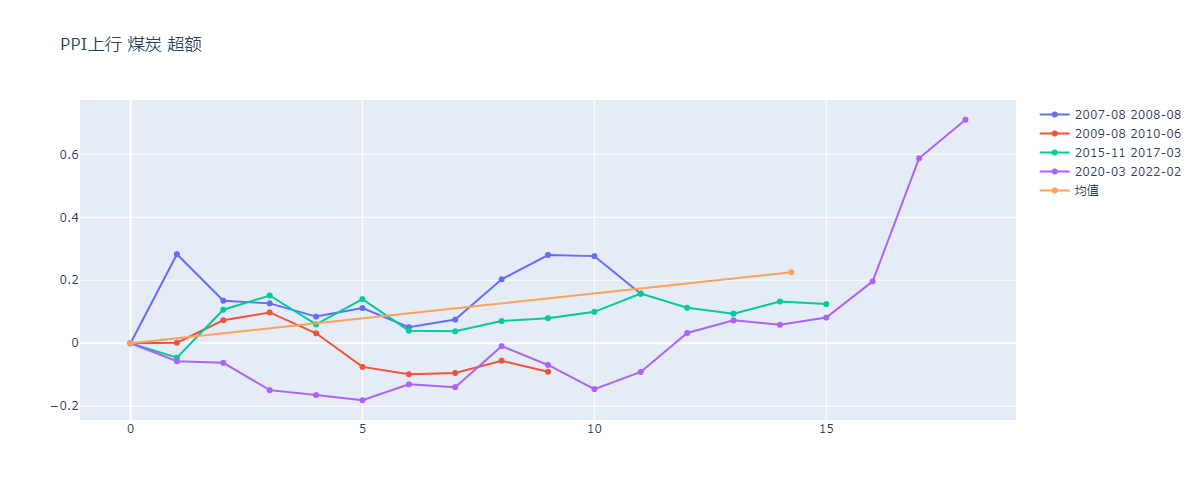

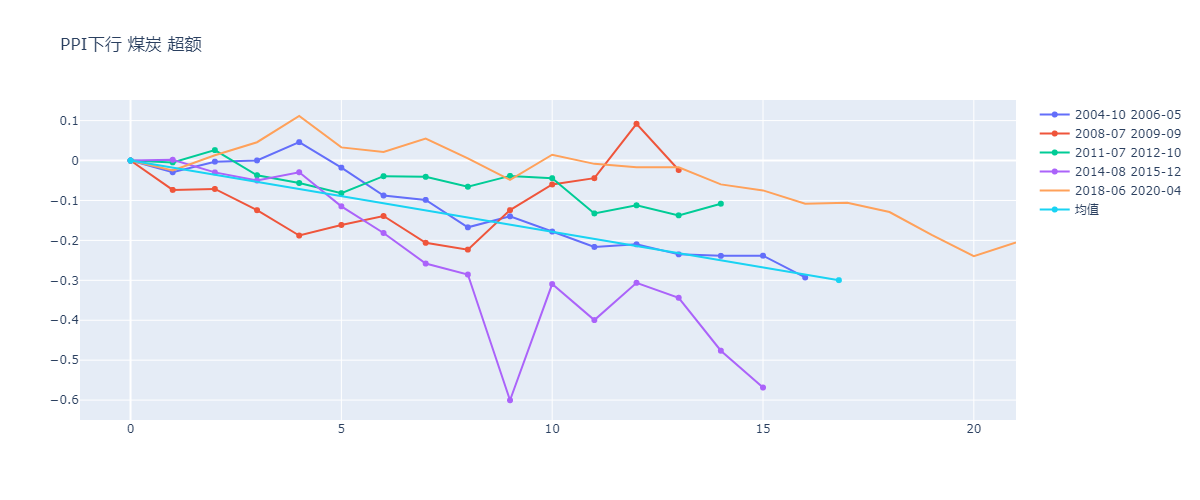

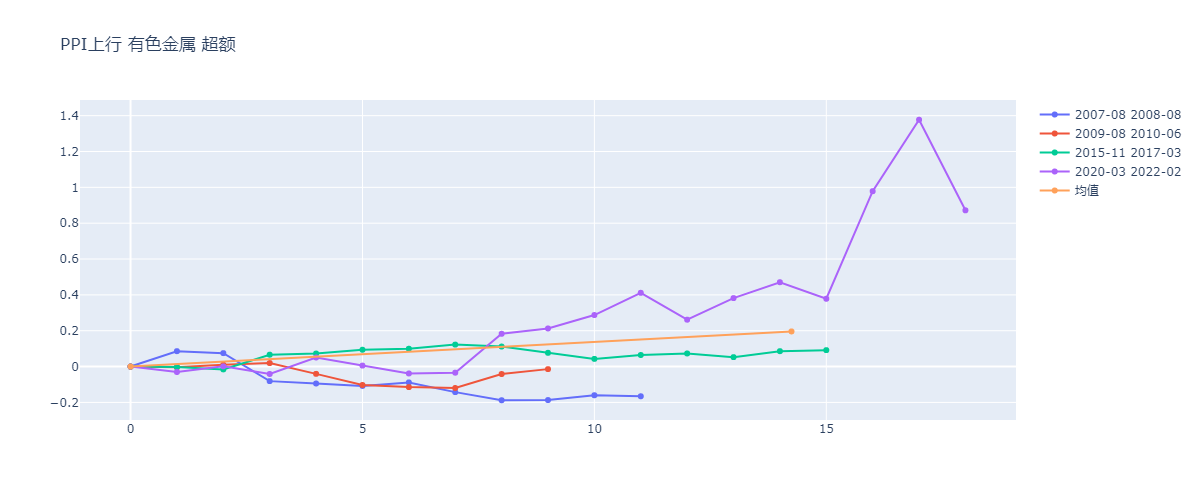

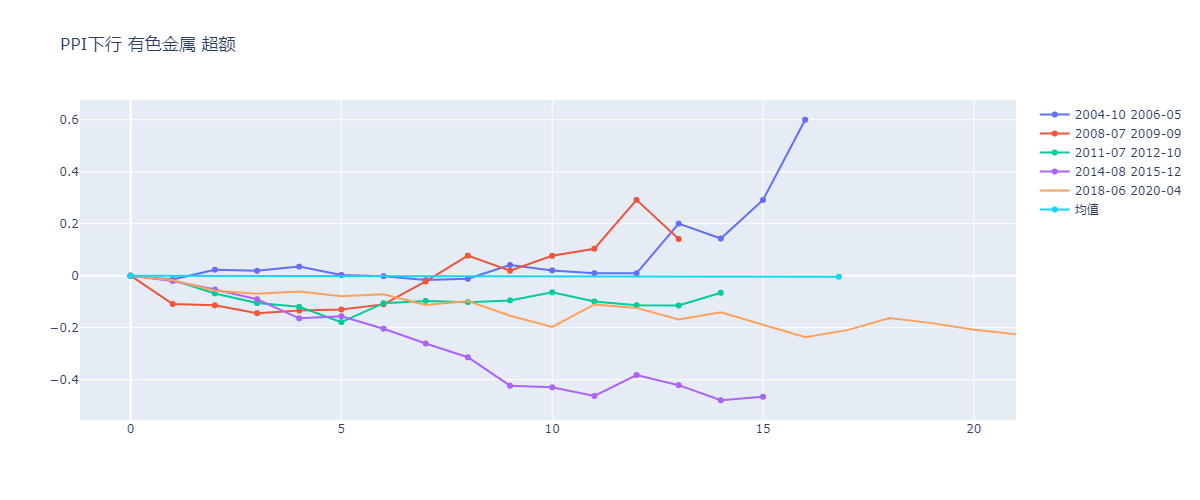

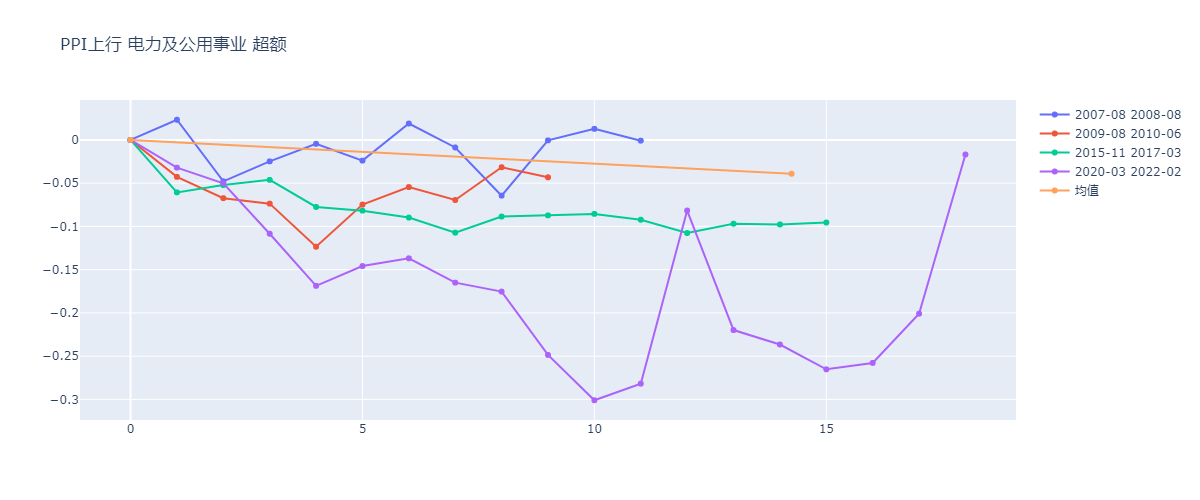

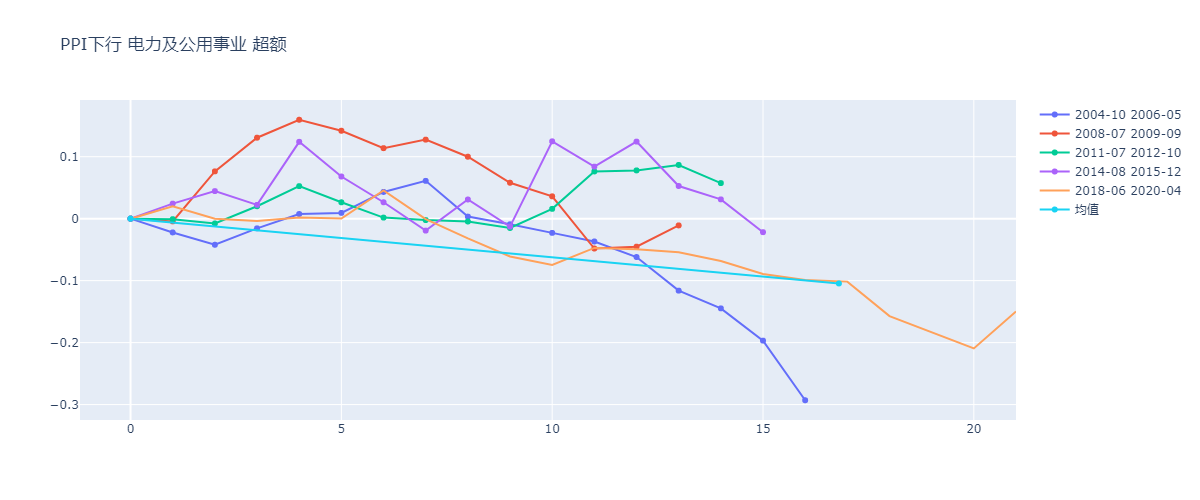

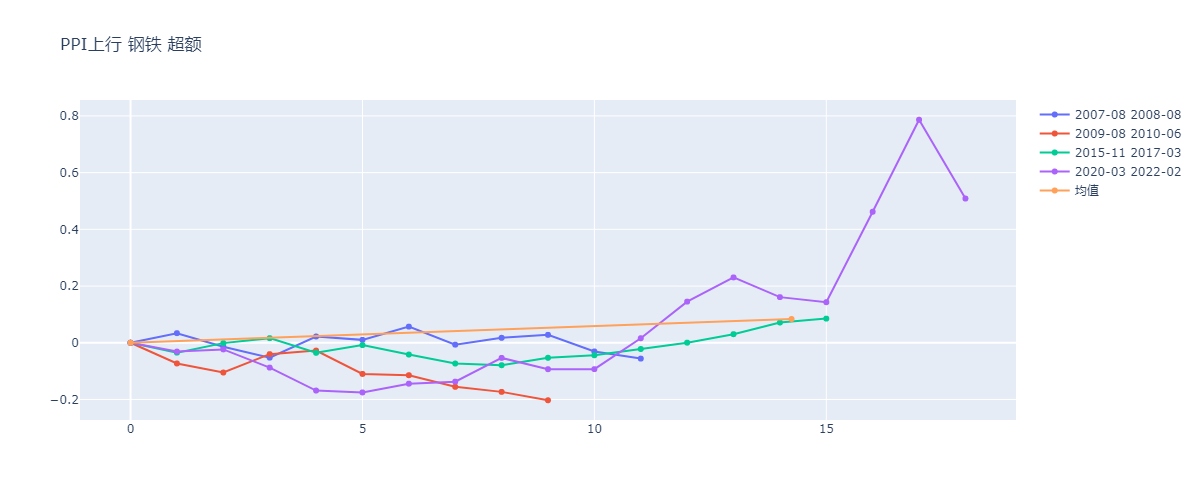

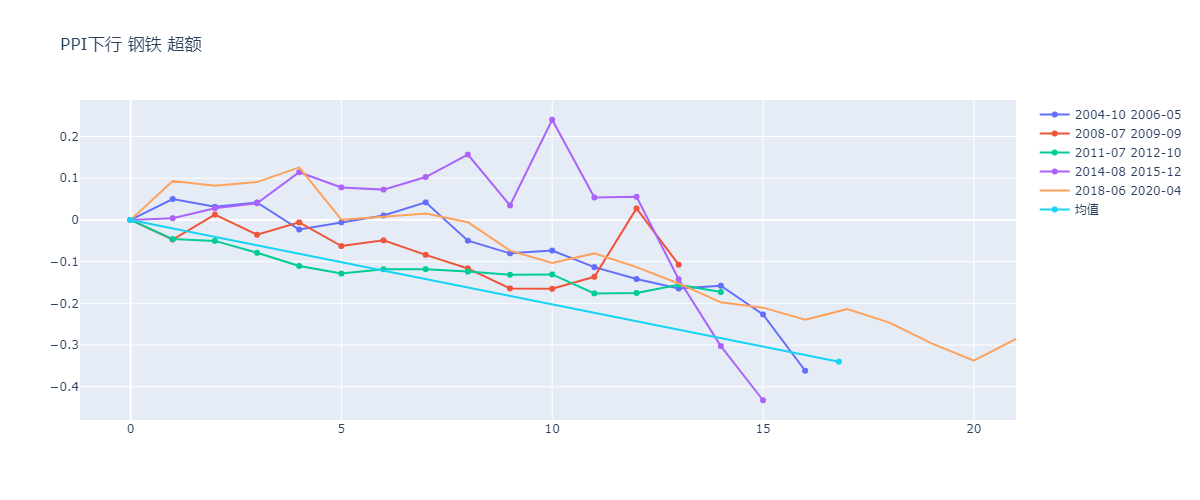

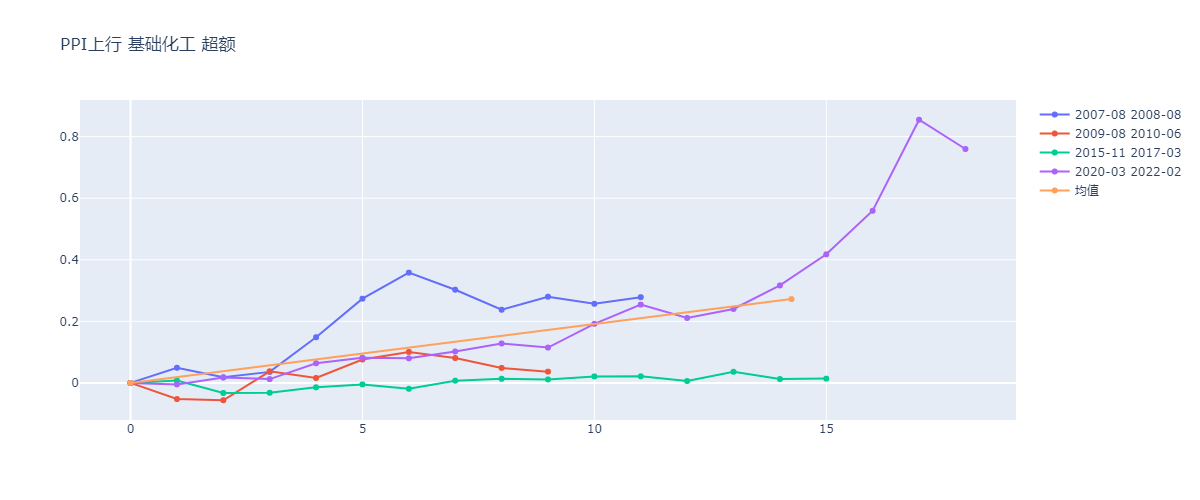

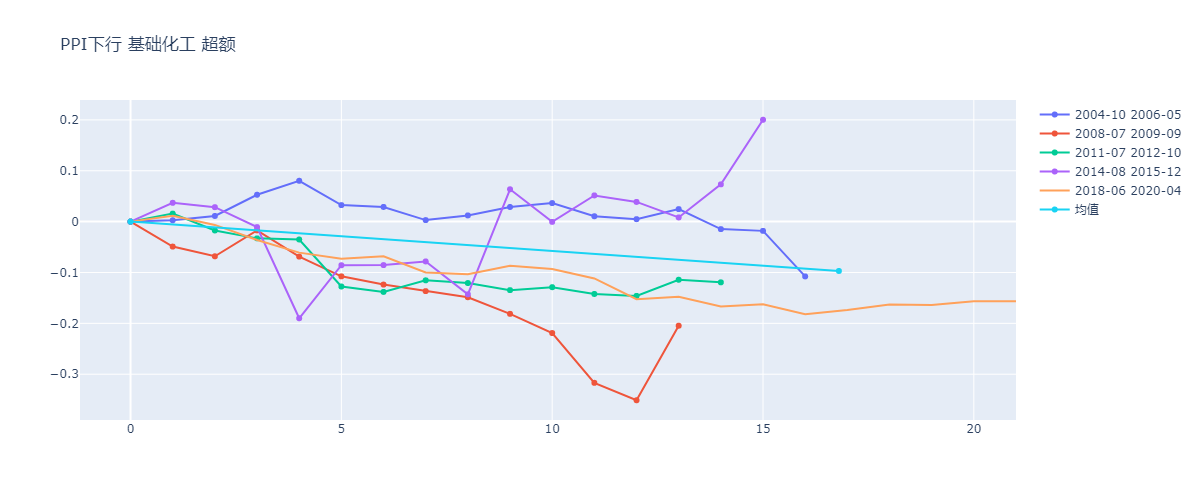

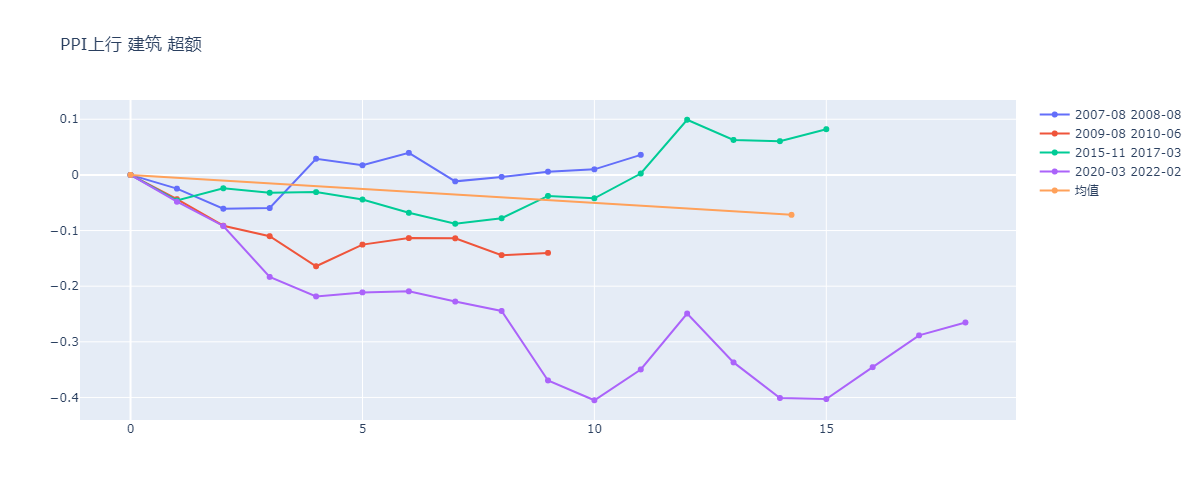

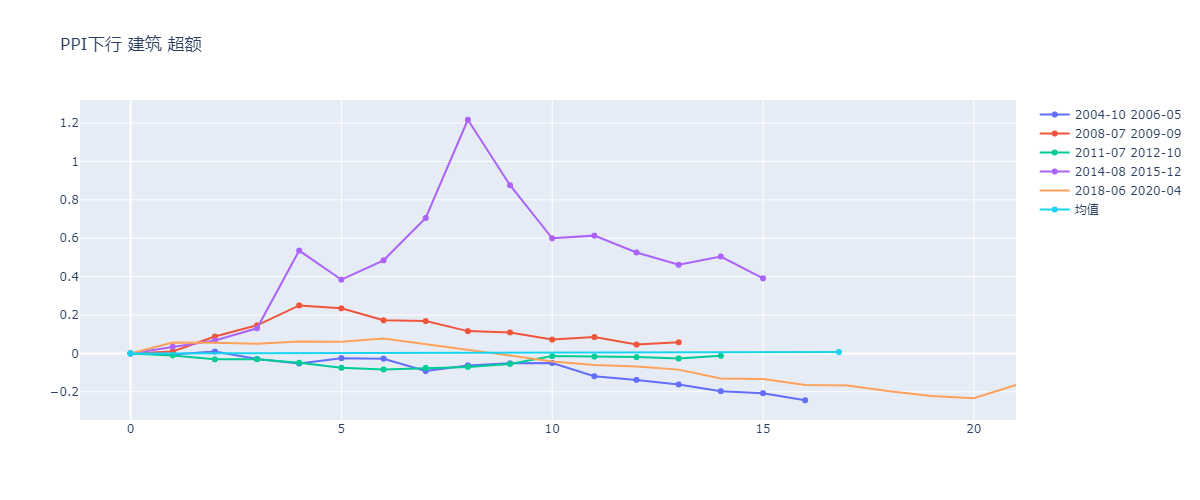

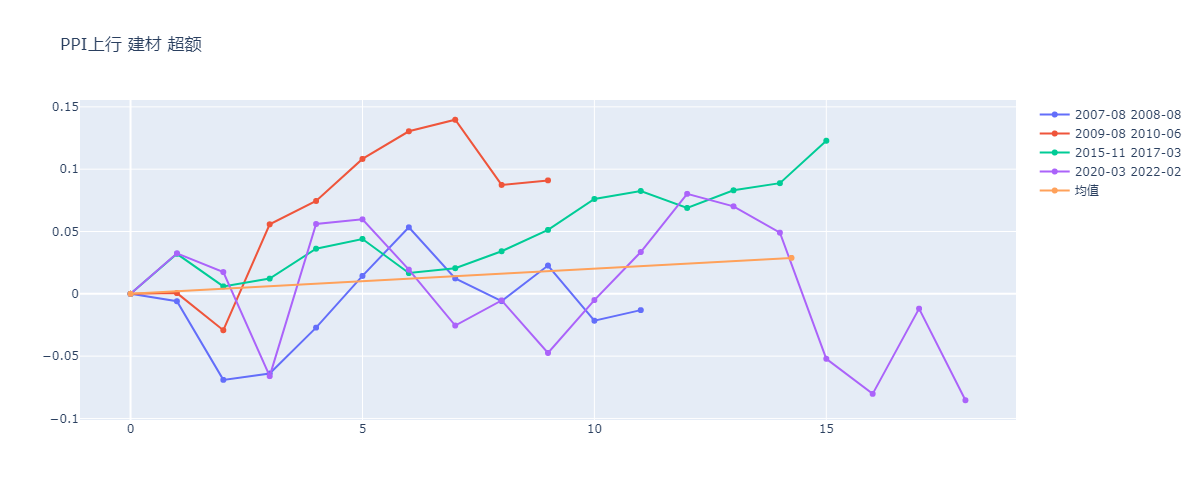

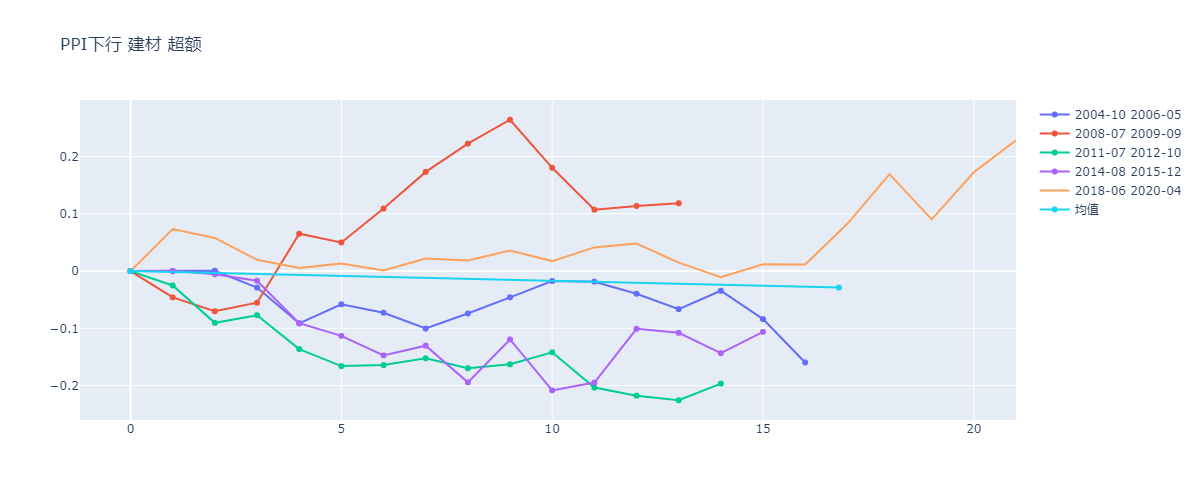

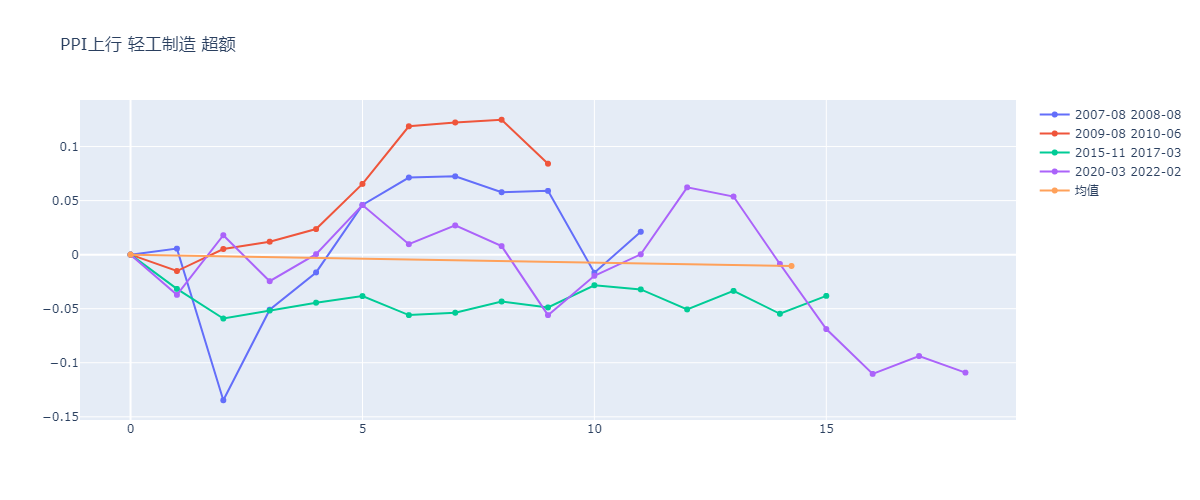

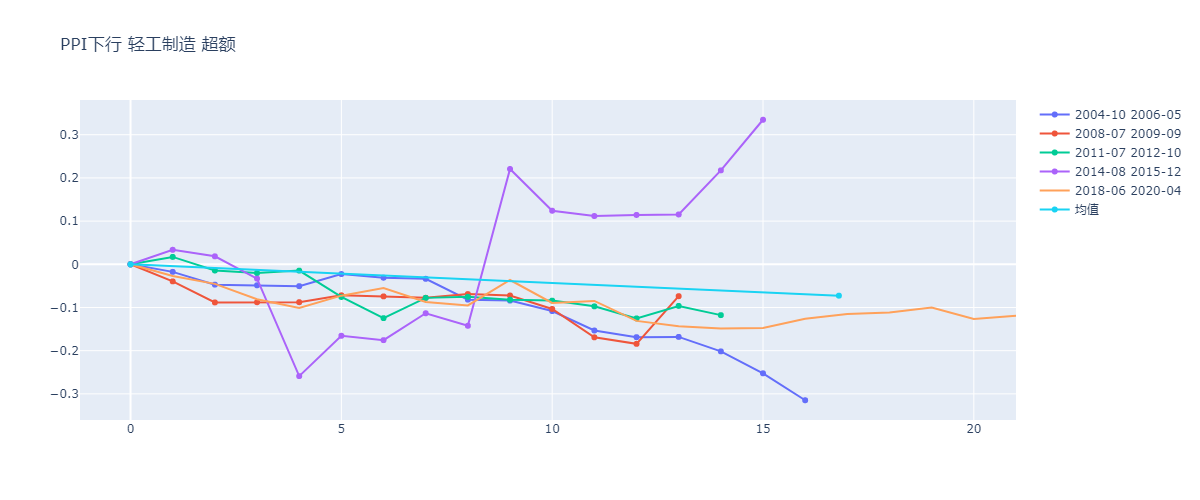

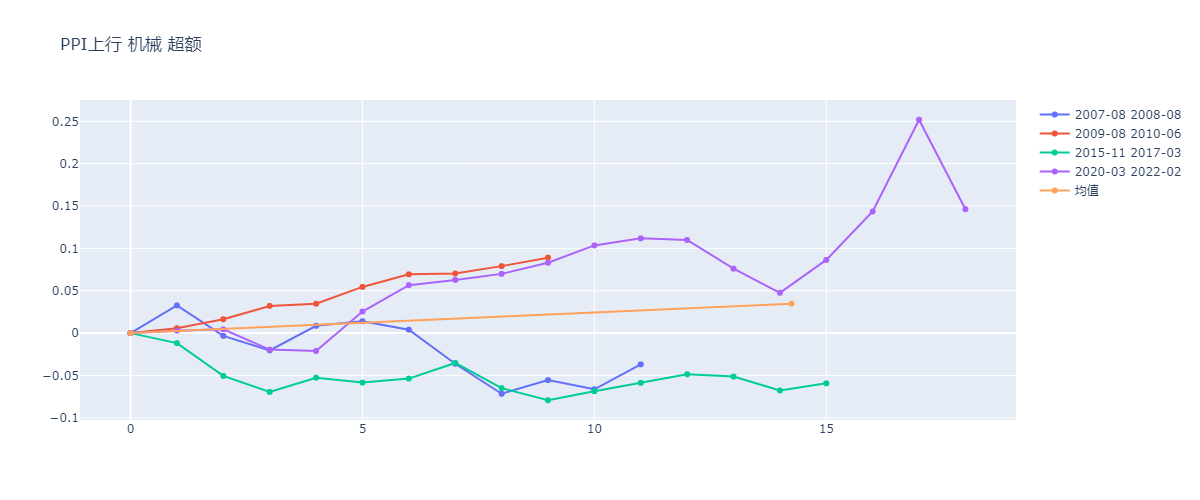

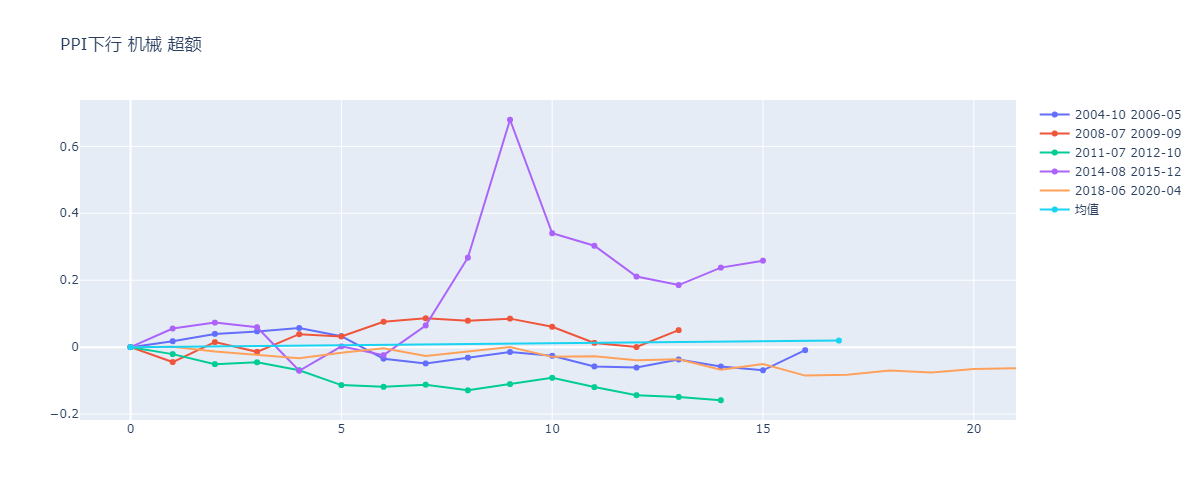

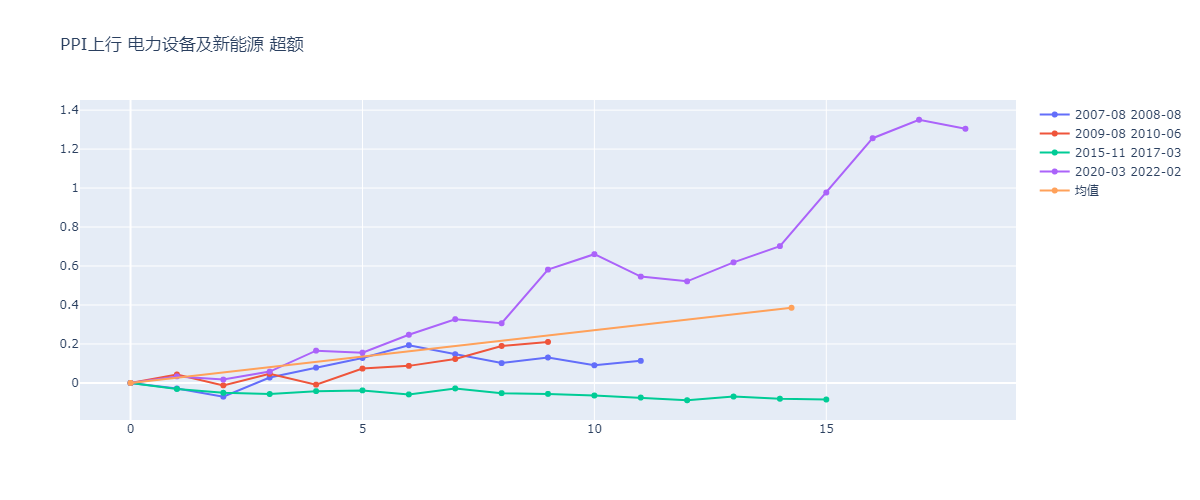

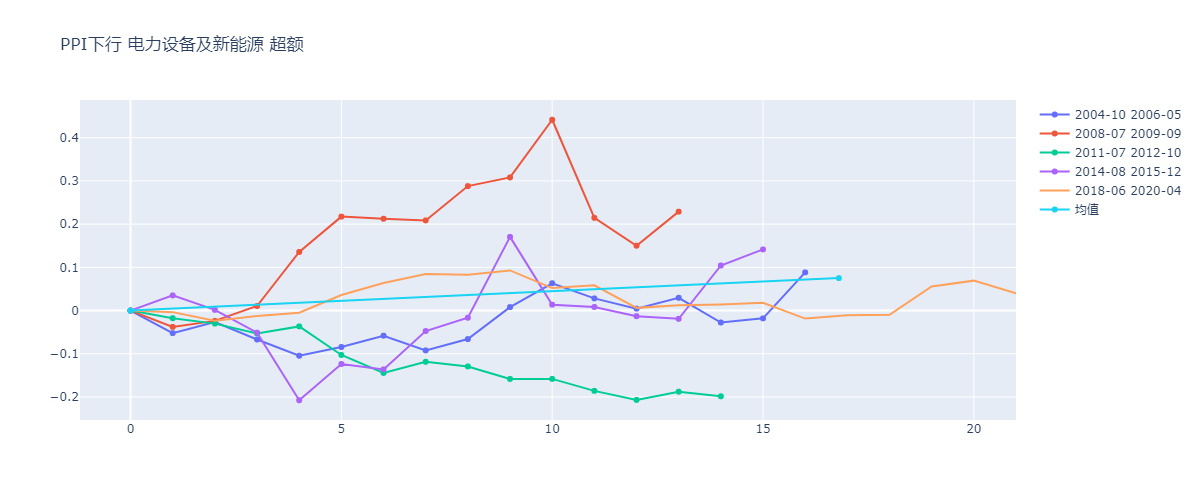

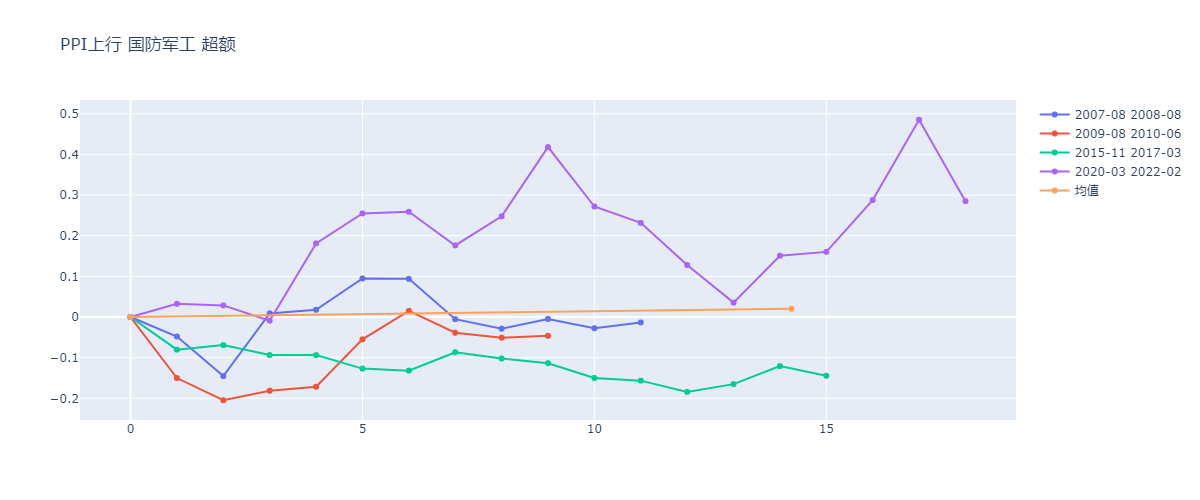

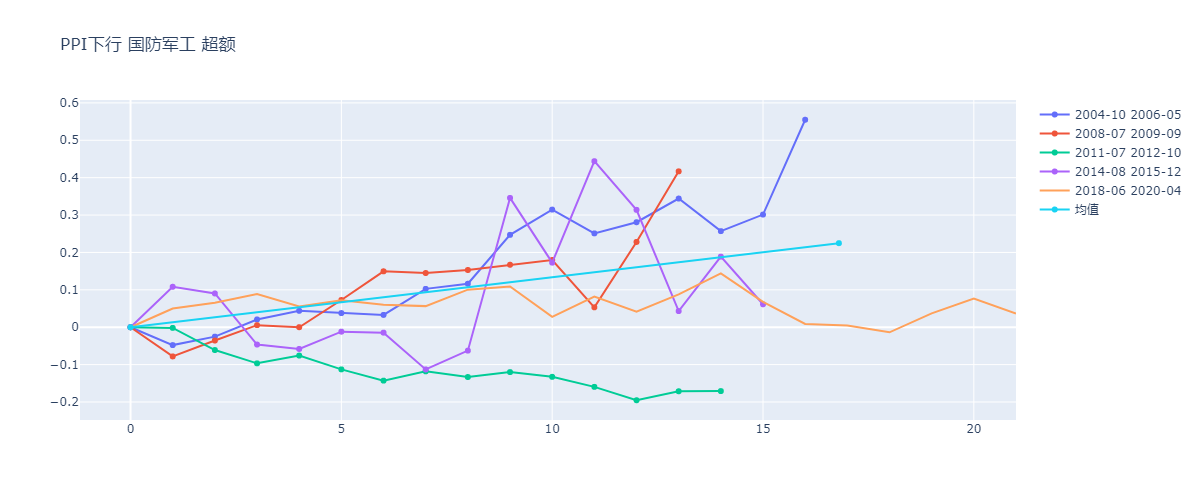

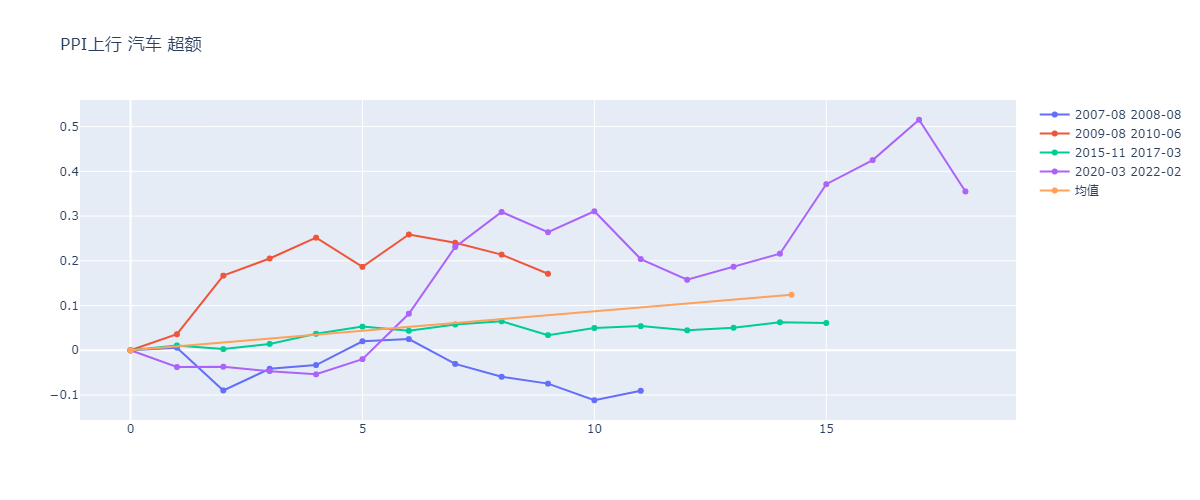

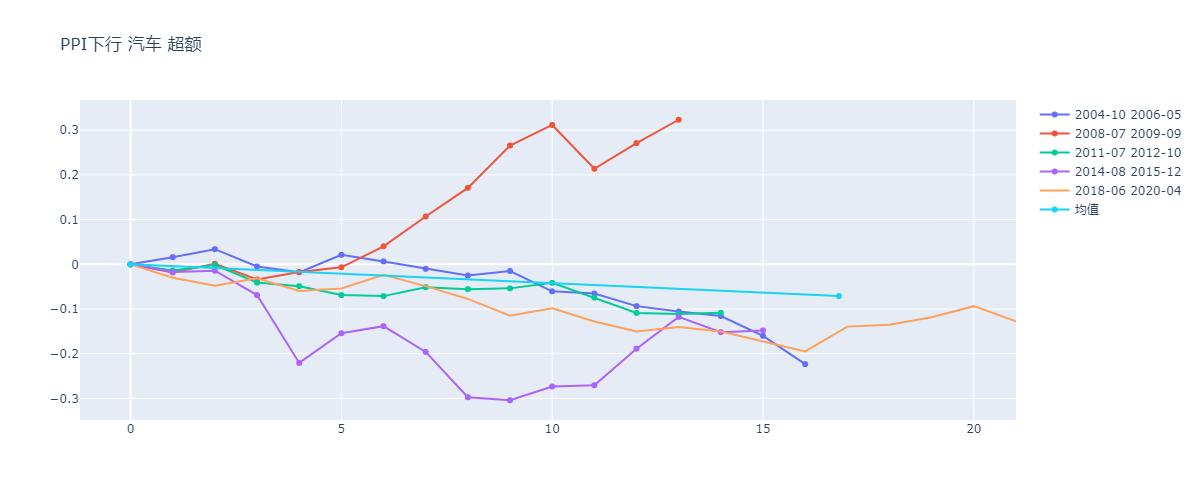

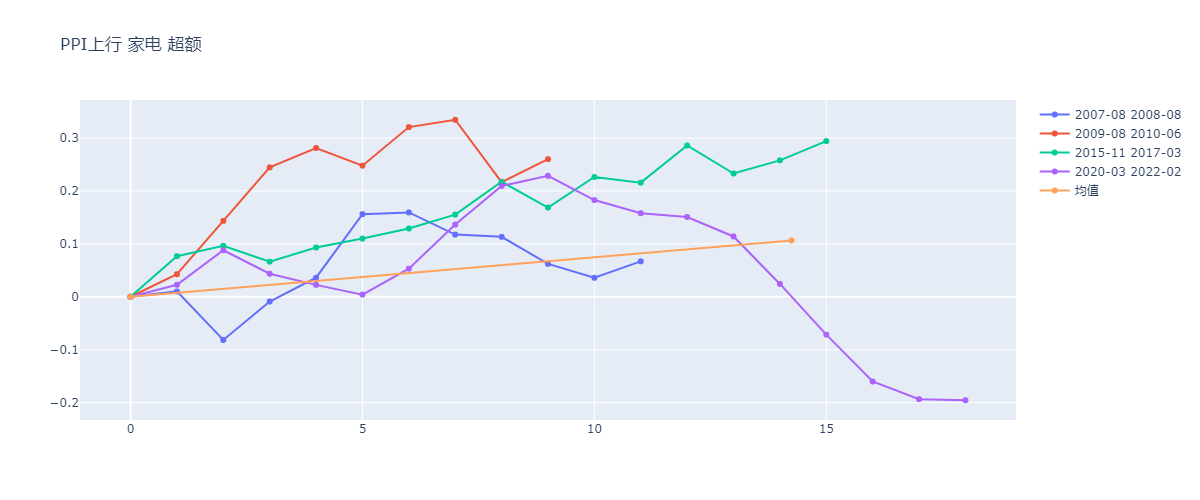

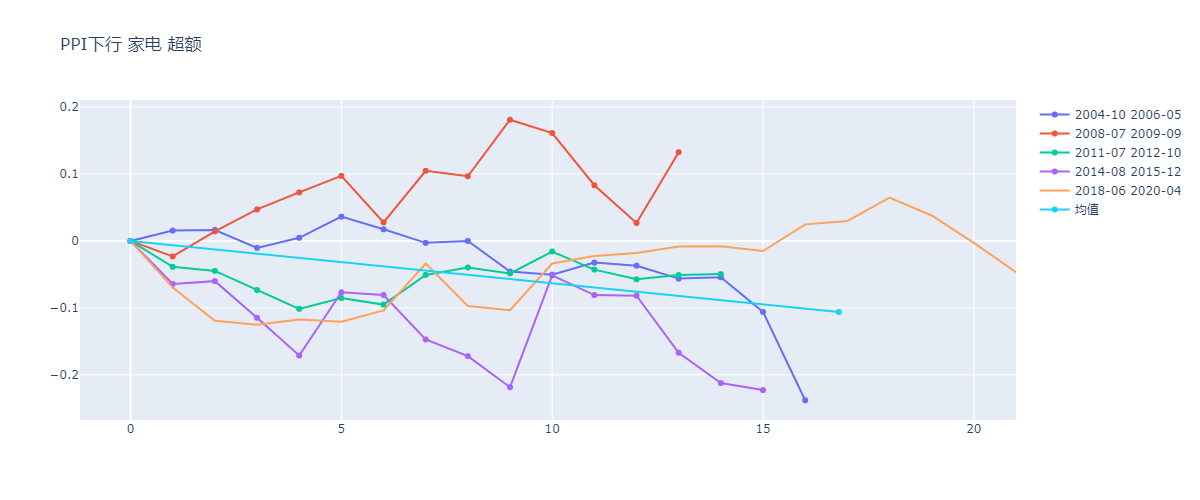

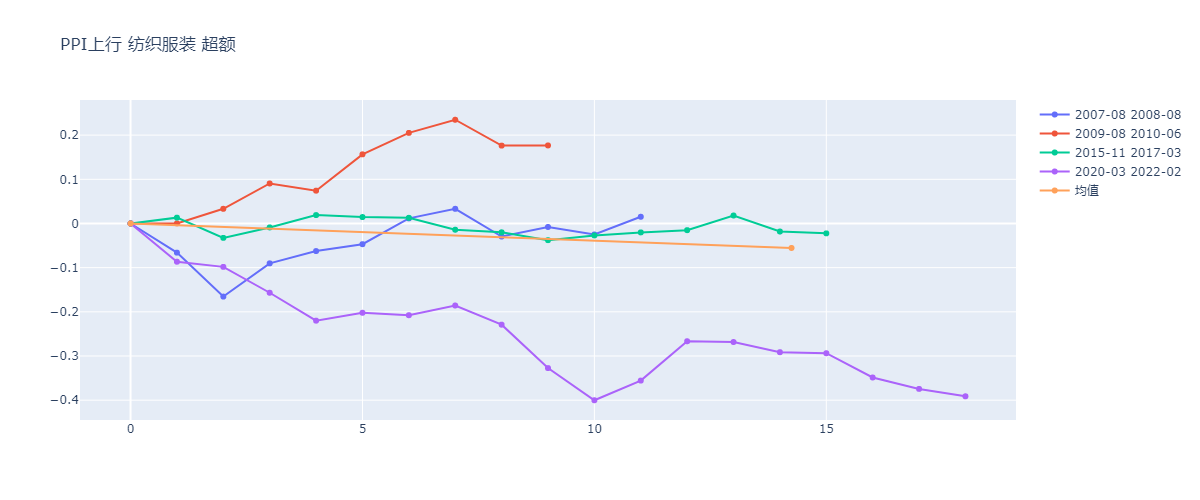

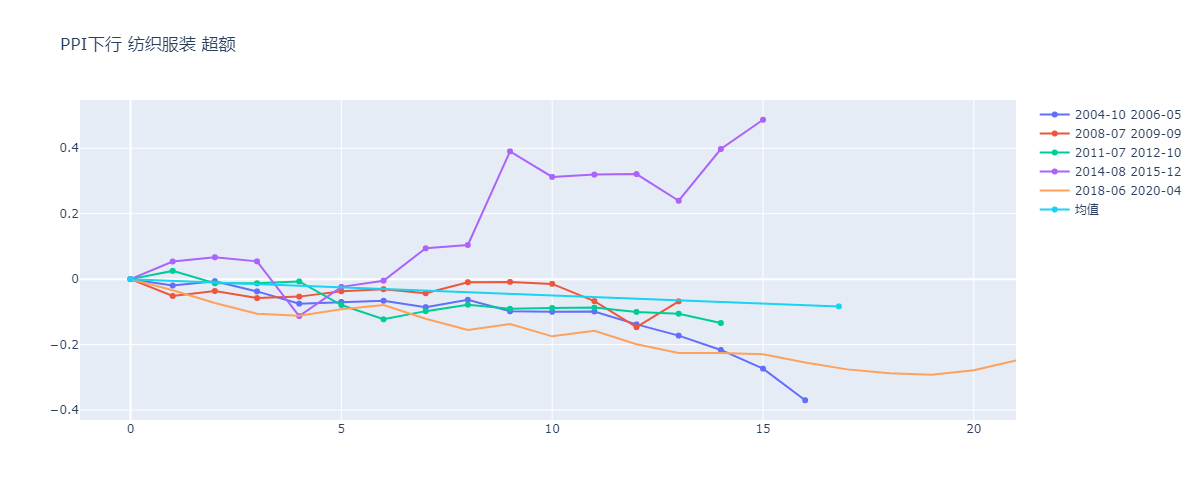

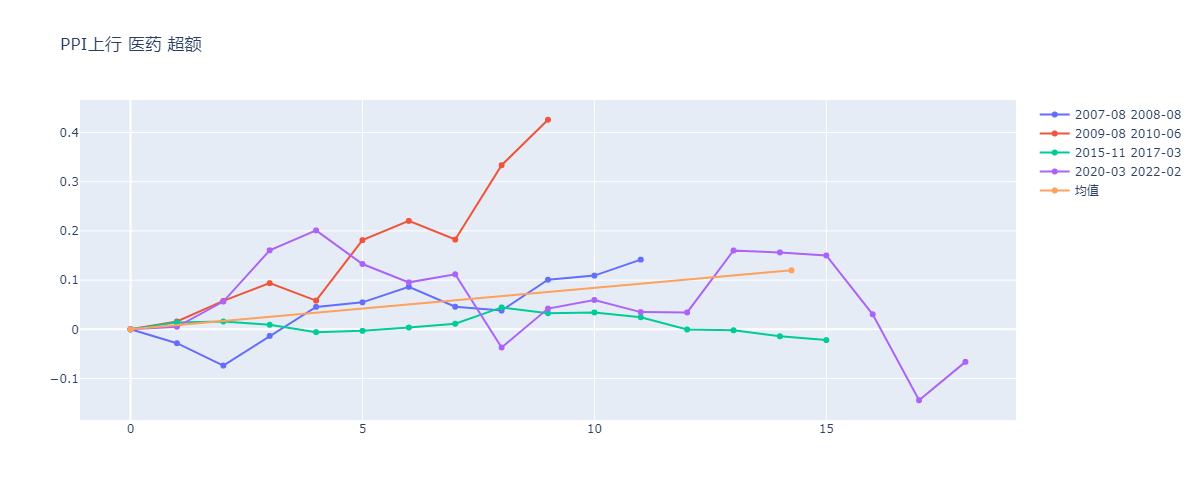

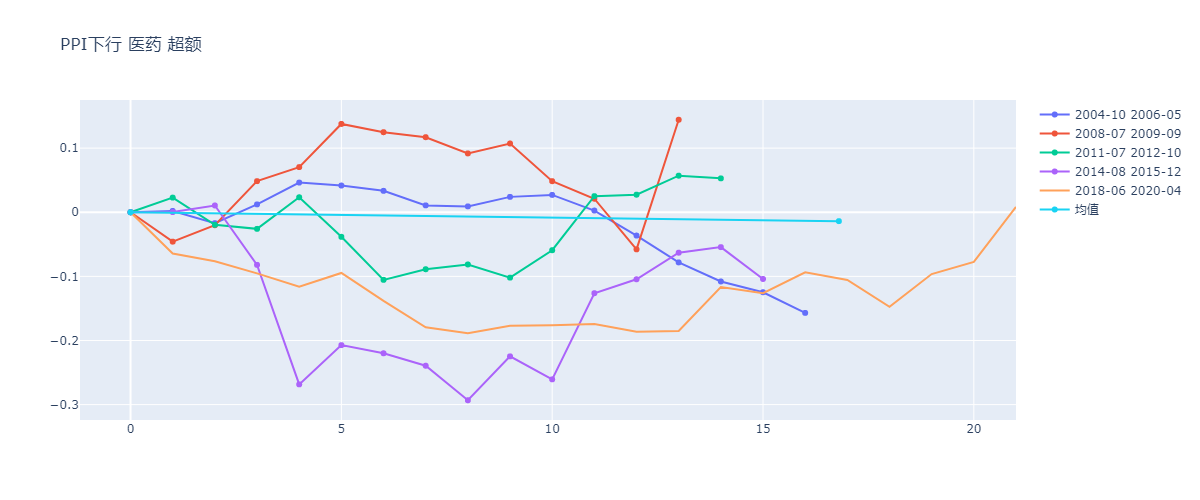

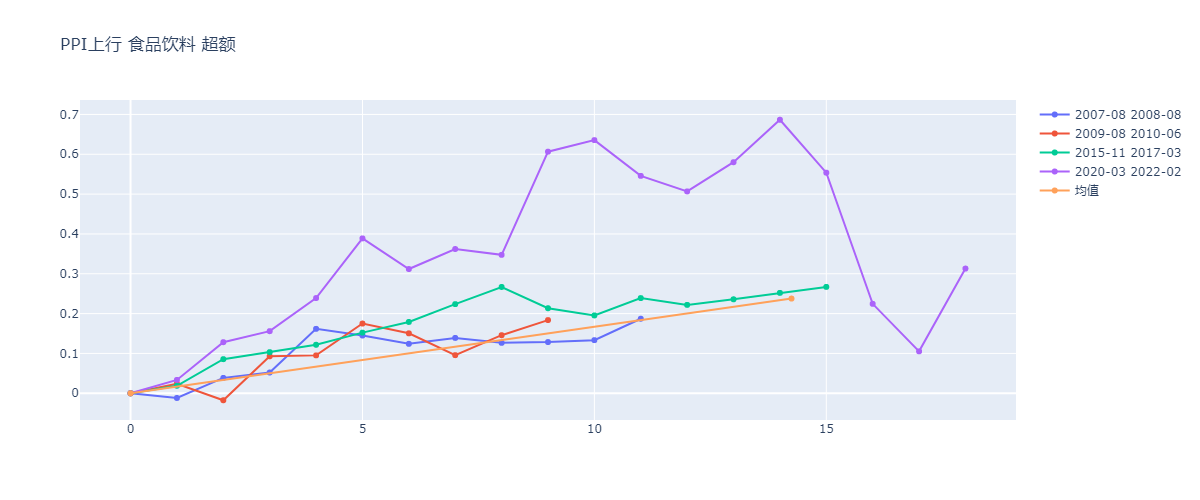

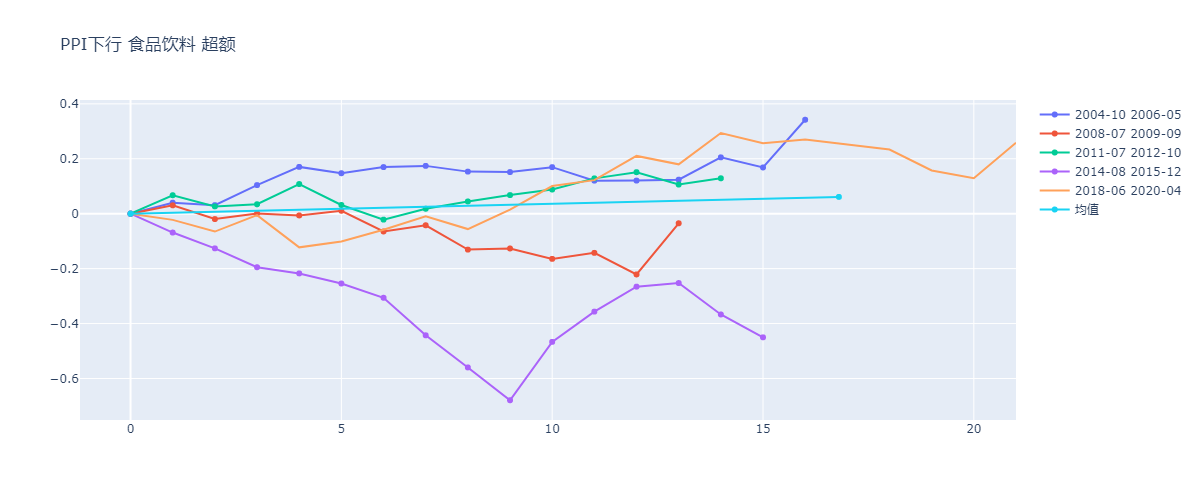

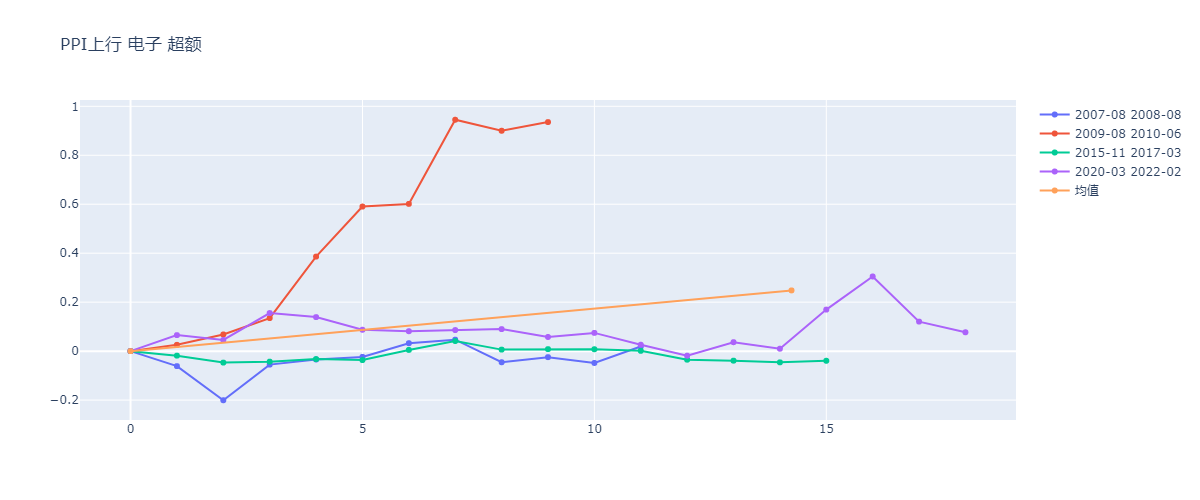

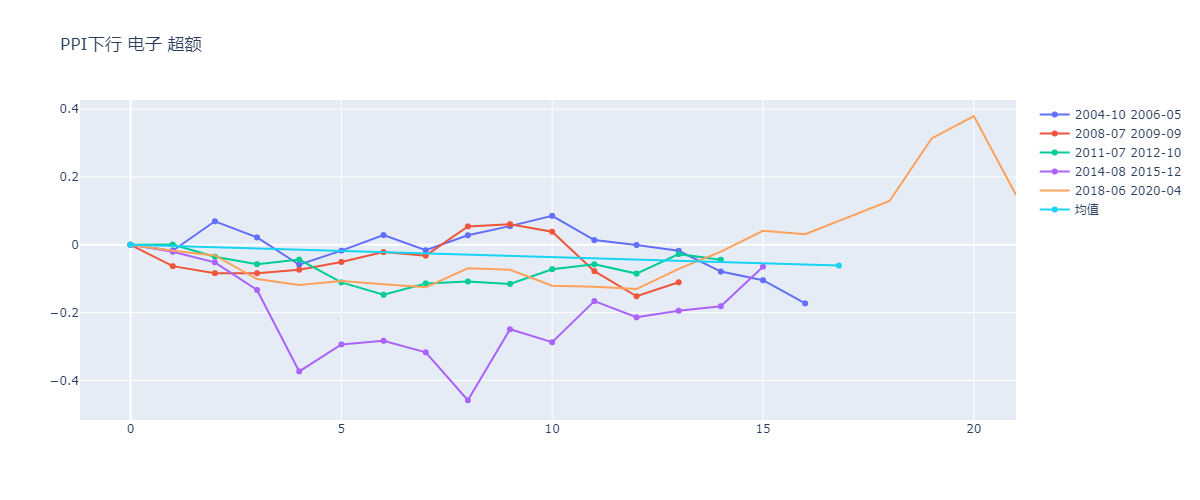

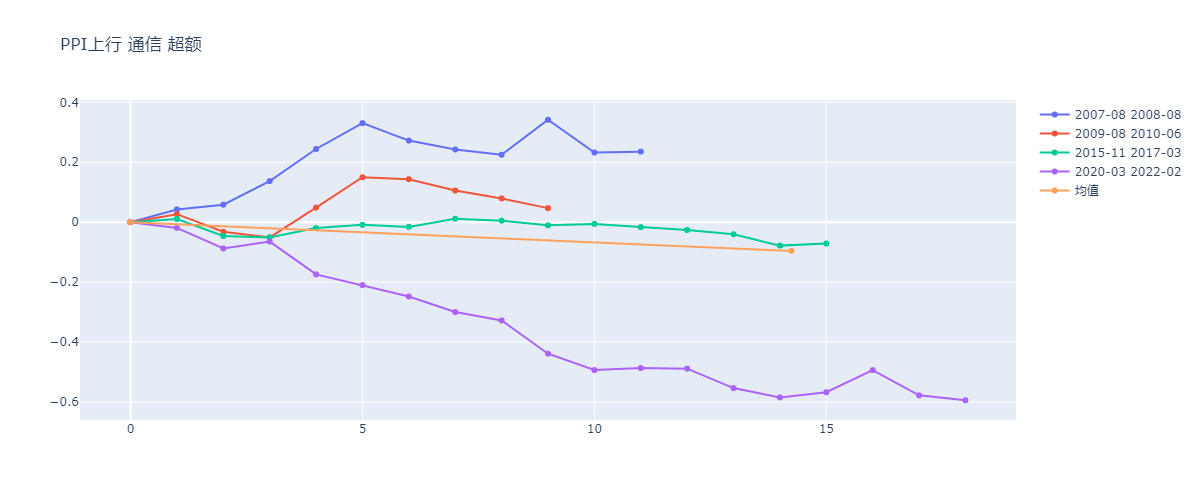

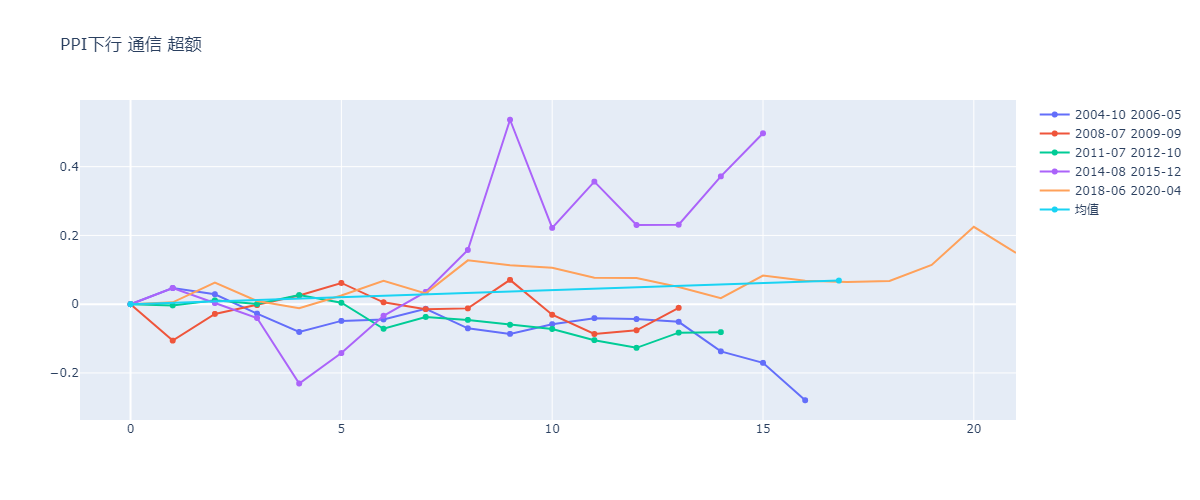

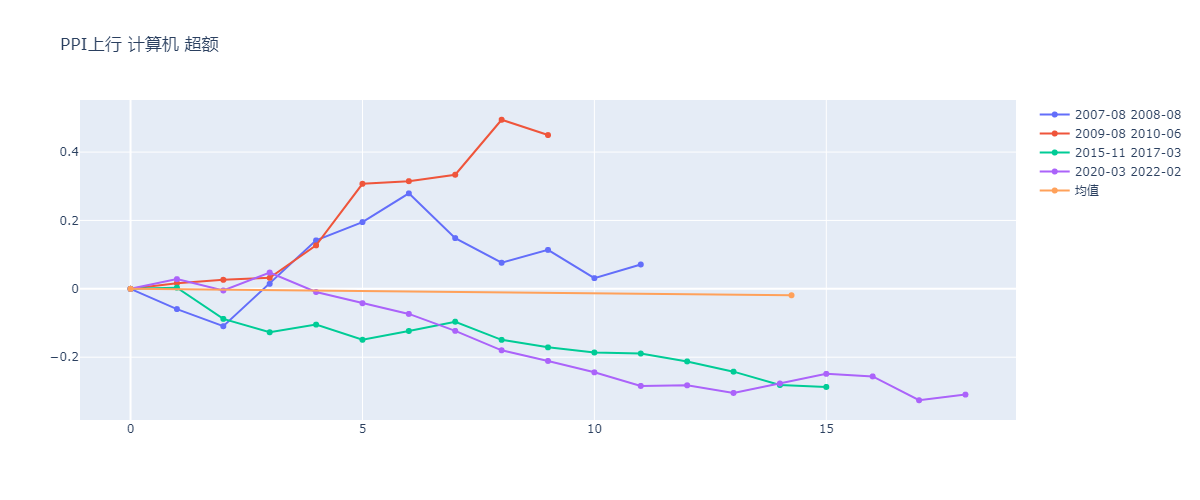

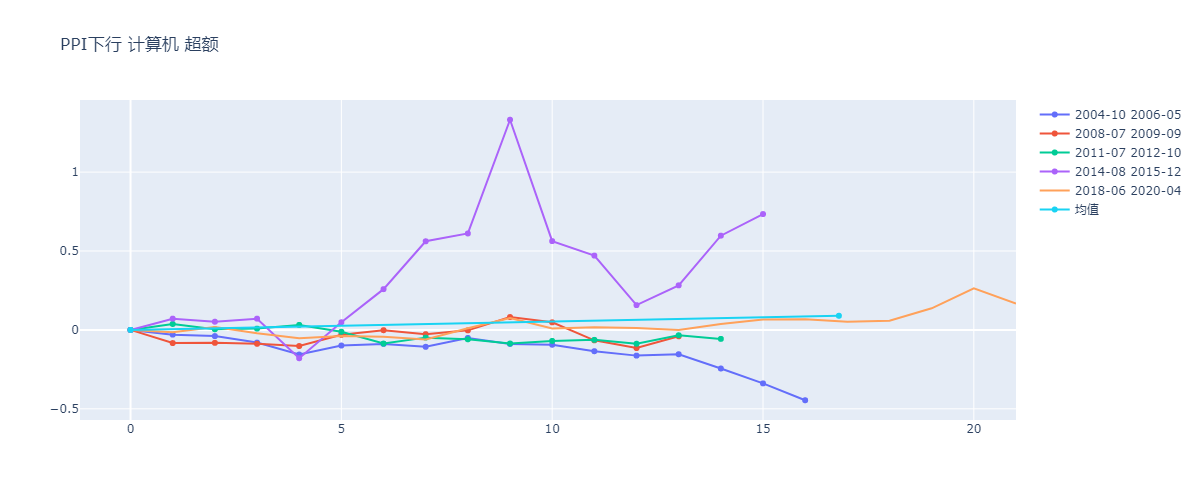

In [48]:
# 行业超额收益与PPI对比
citic_use_cols = ['石油石化', '煤炭', '有色金属', '电力及公用事业', '钢铁', '基础化工', '建筑', '建材', '轻工制造', '机械',
       '电力设备及新能源', '国防军工', '汽车', '家电', '纺织服装', '医药', '食品饮料', '电子', '通信', '计算机']
for i in citic_use_cols:
    basic_compare(i, alpha=True)

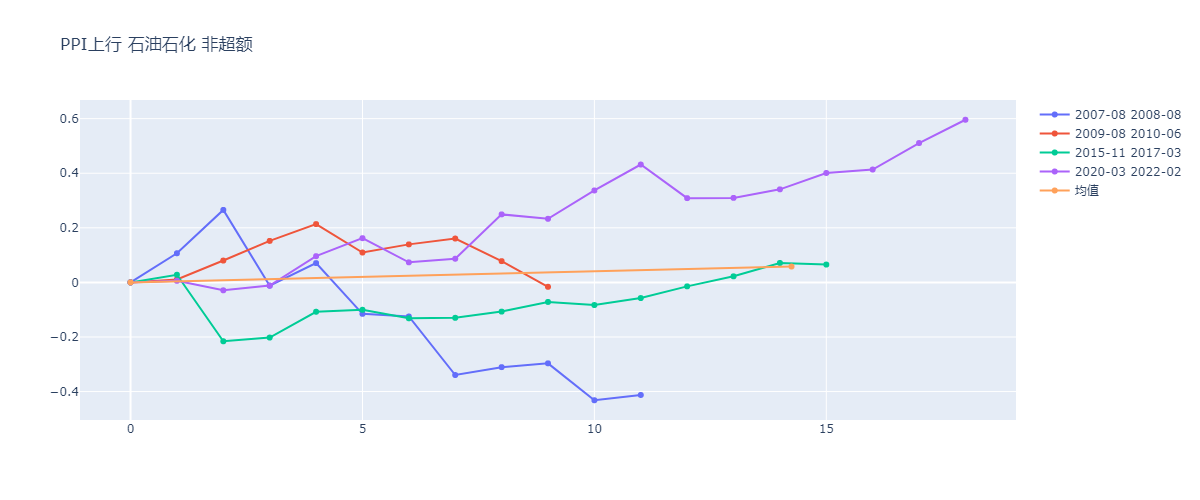

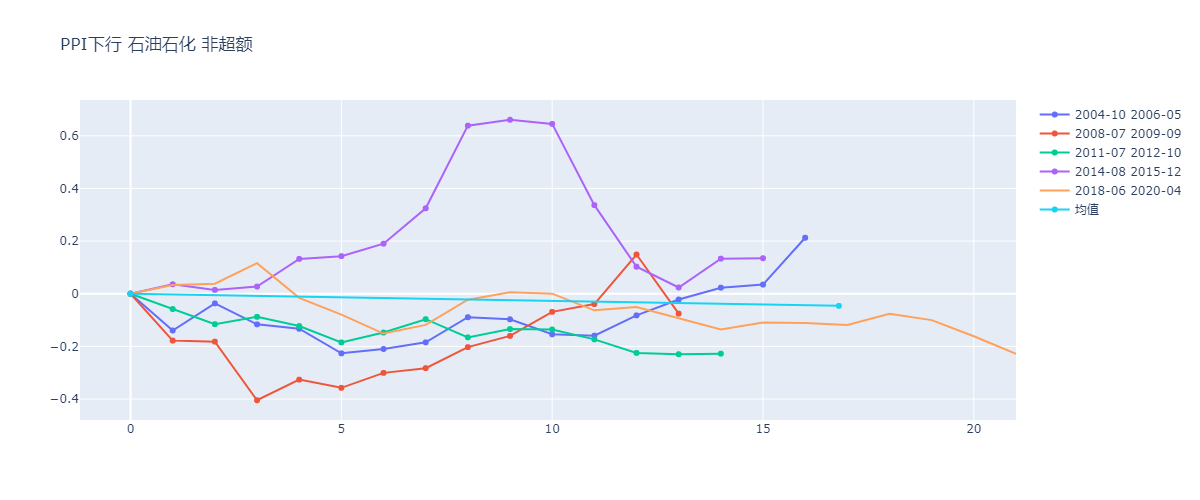

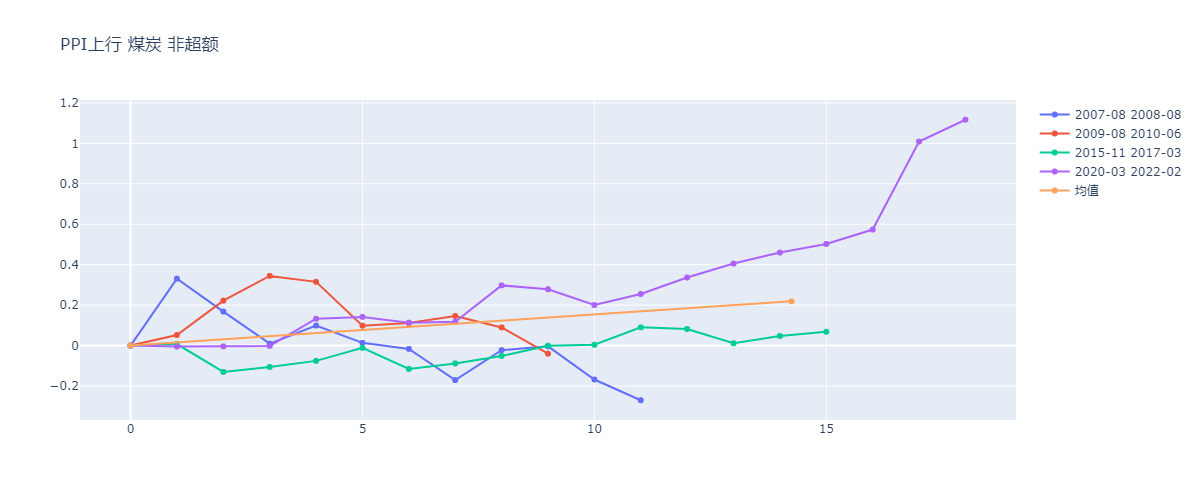

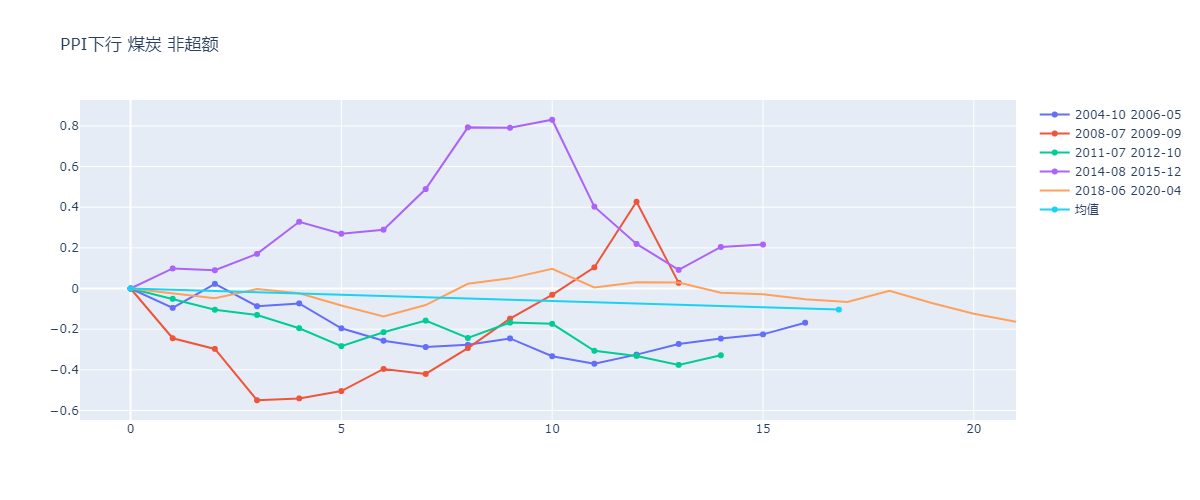

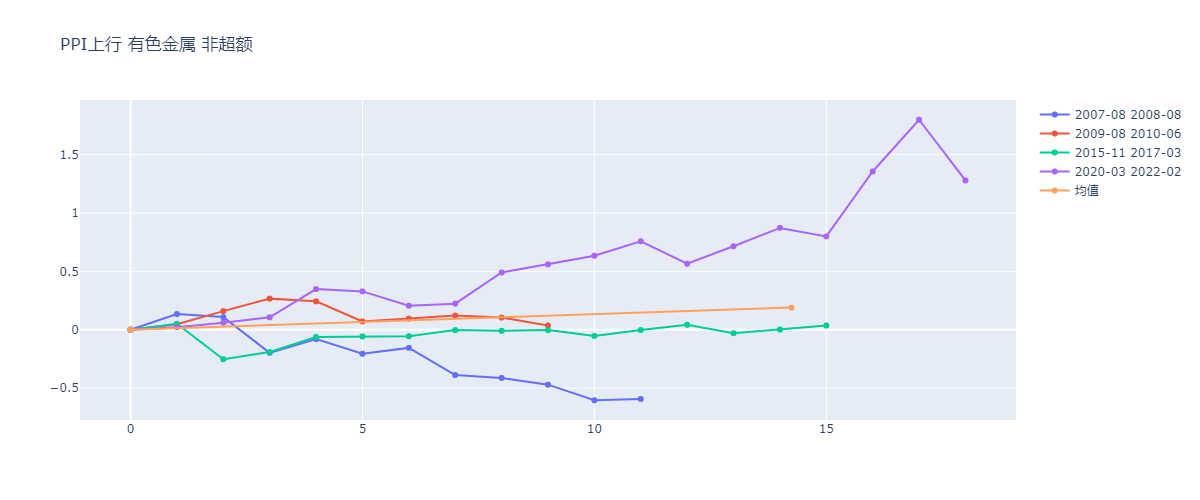

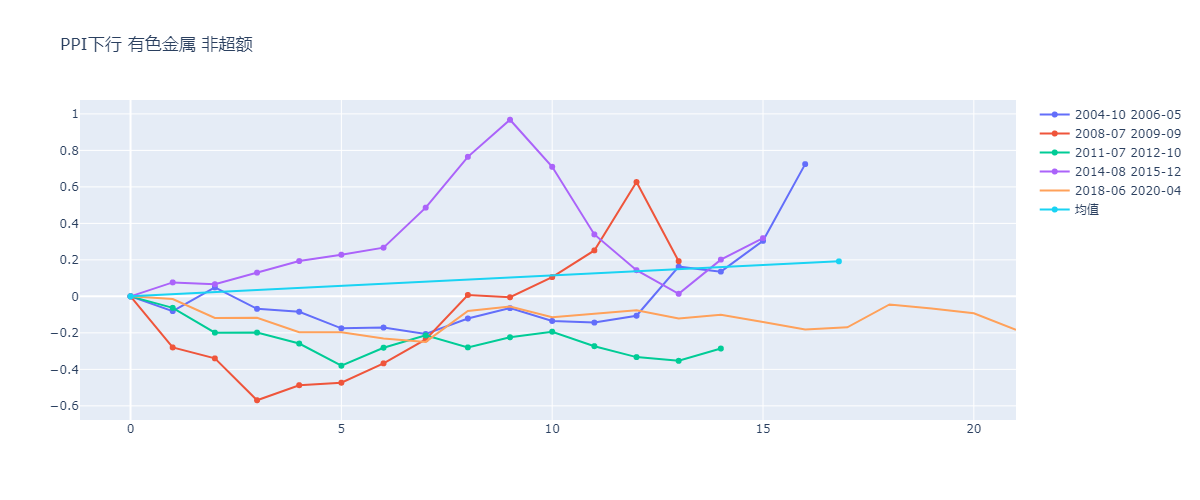

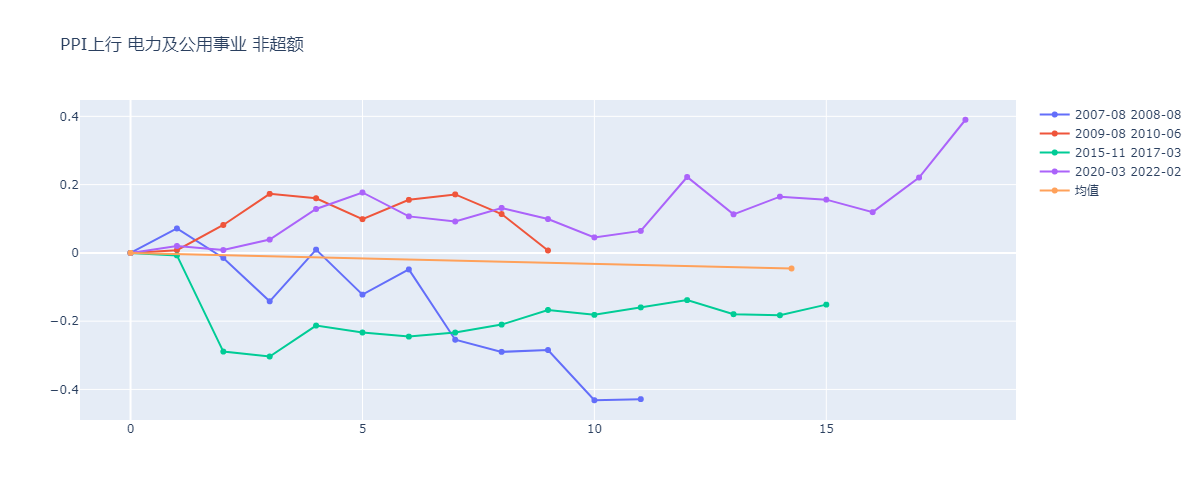

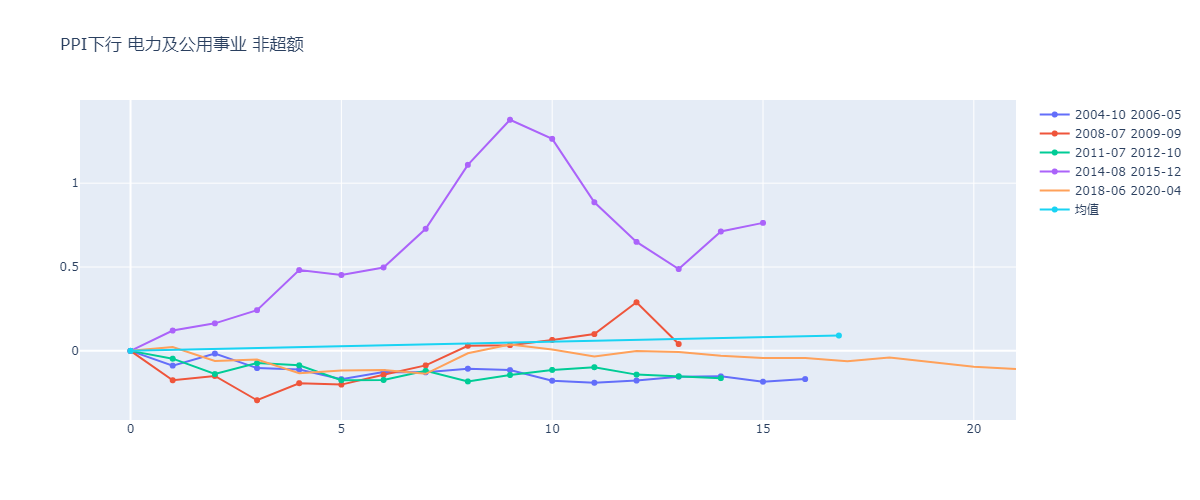

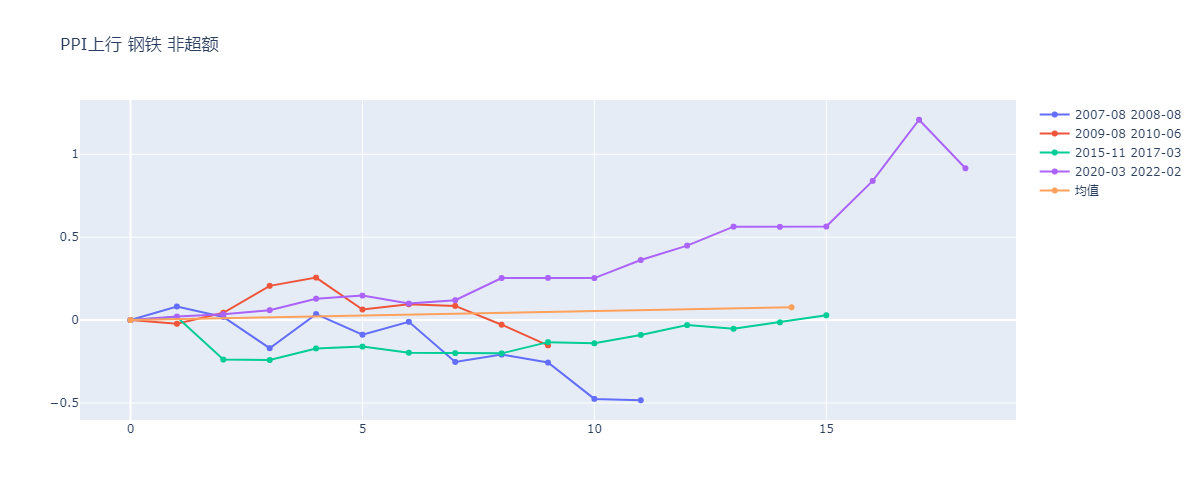

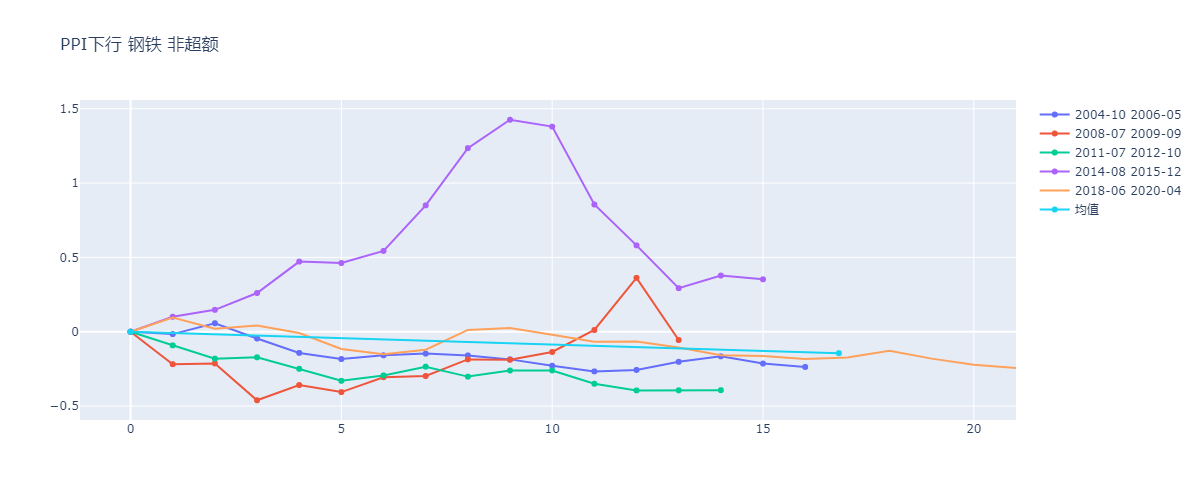

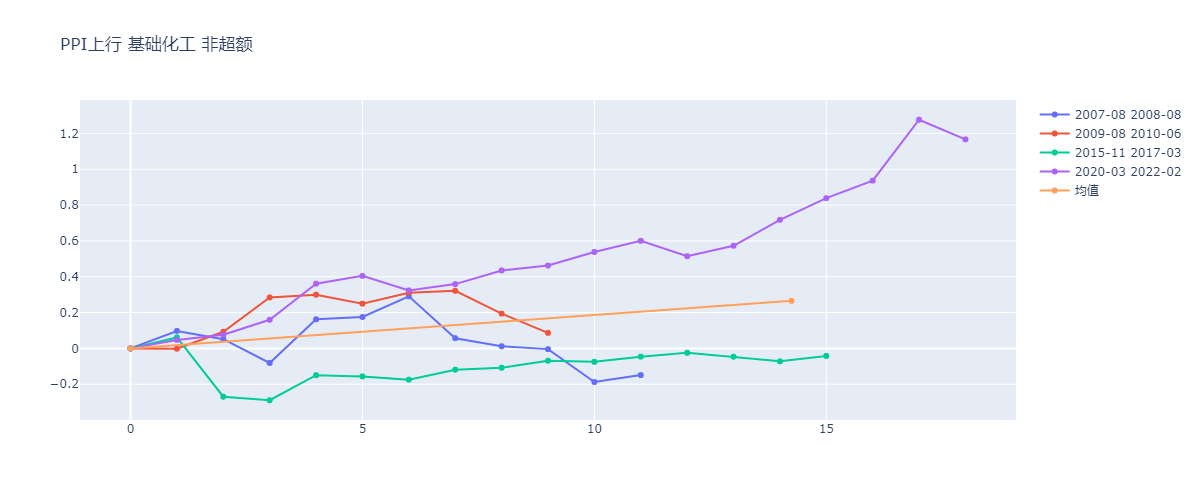

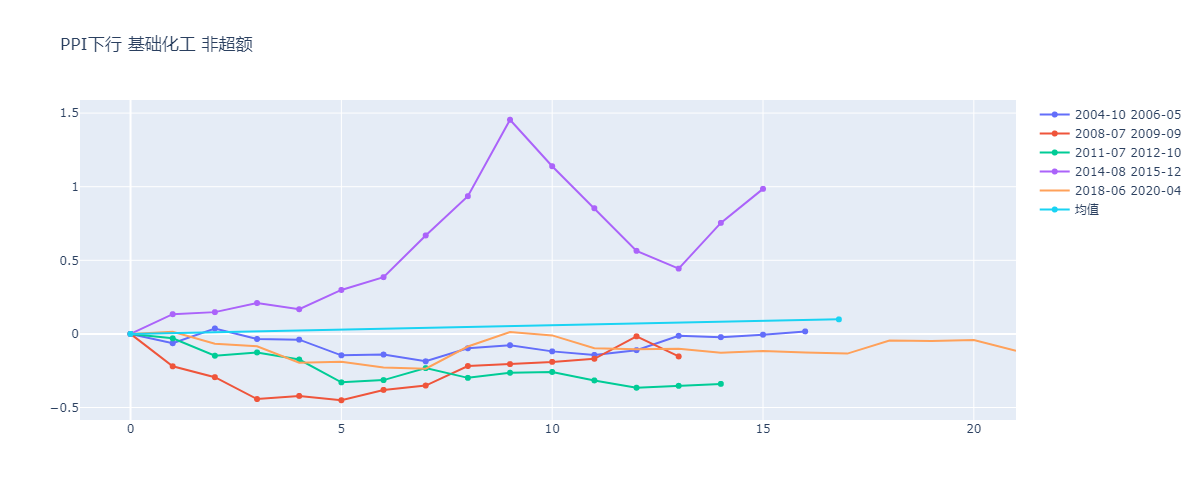

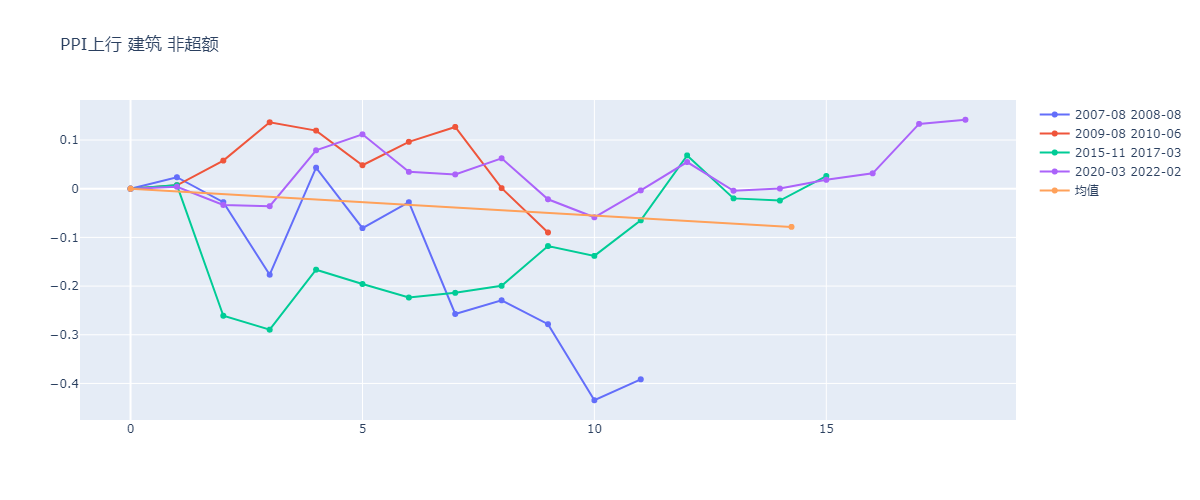

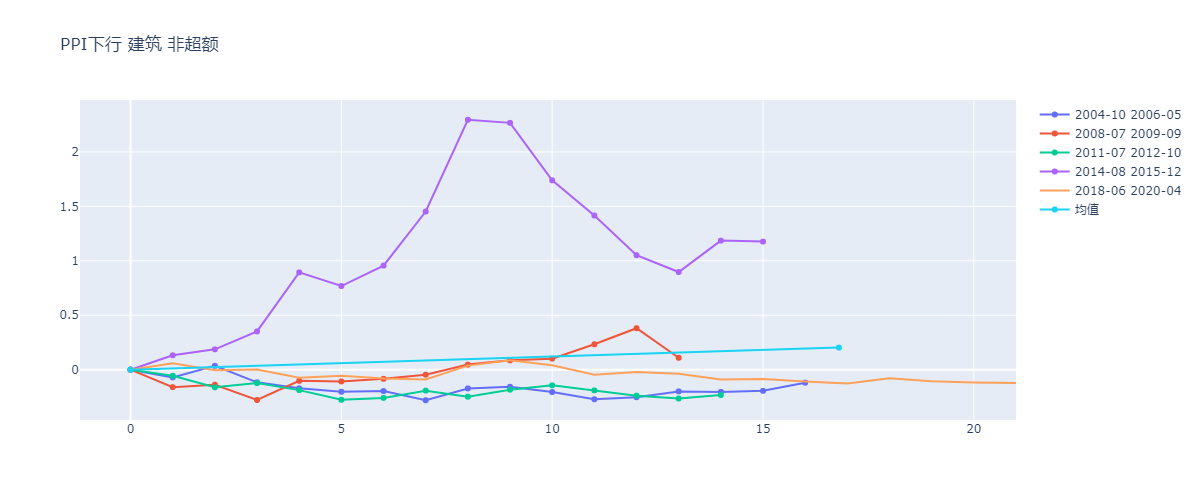

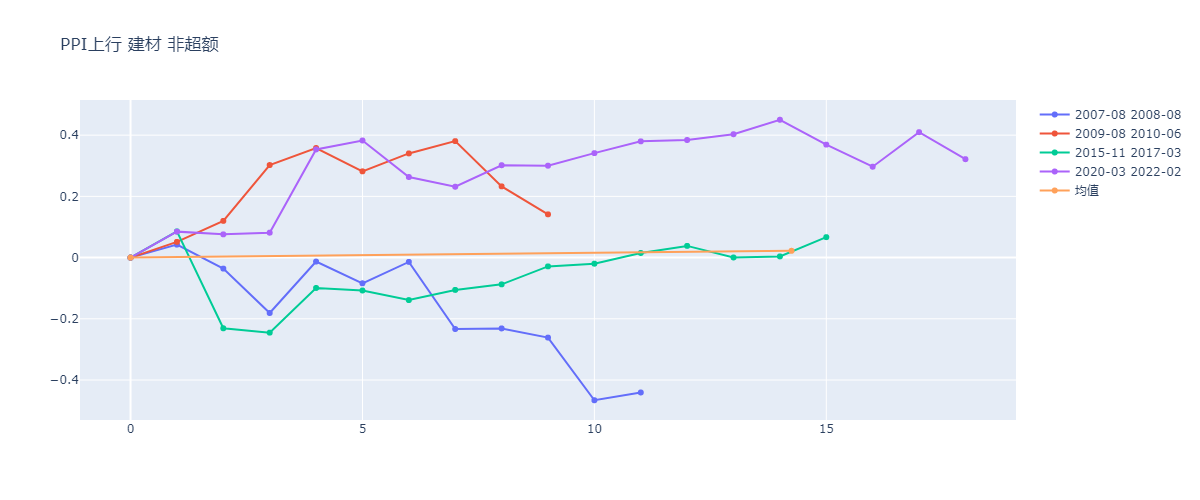

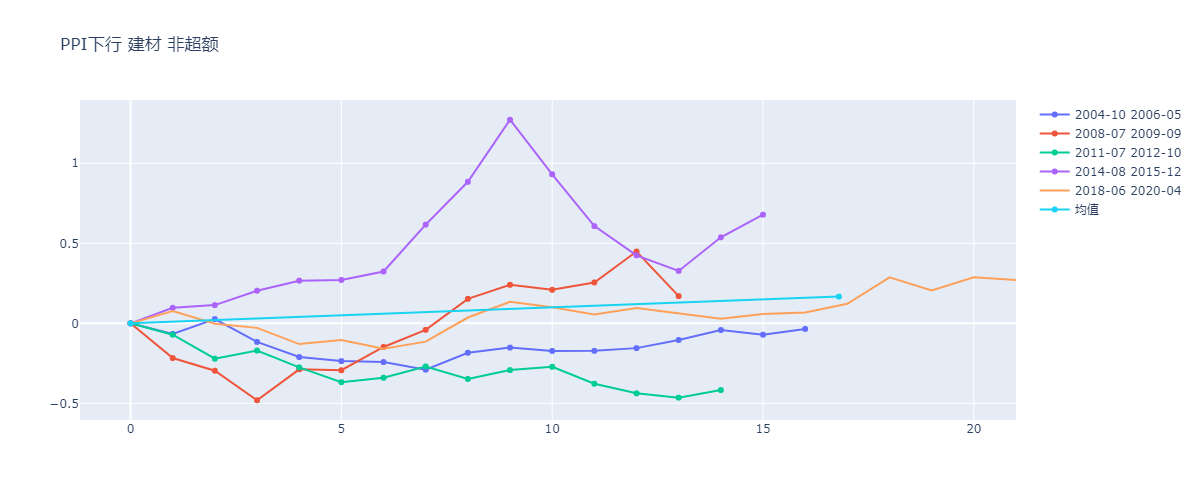

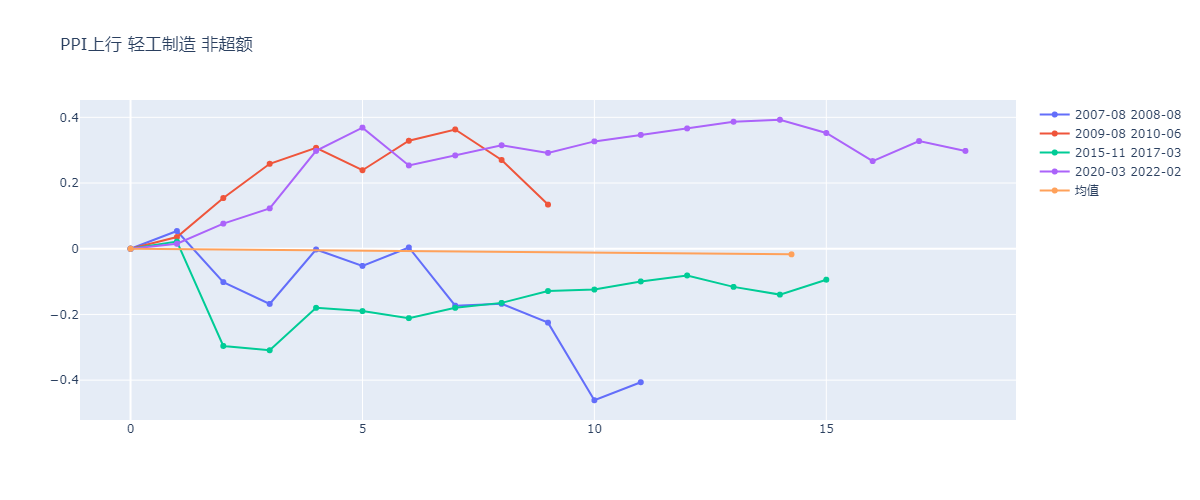

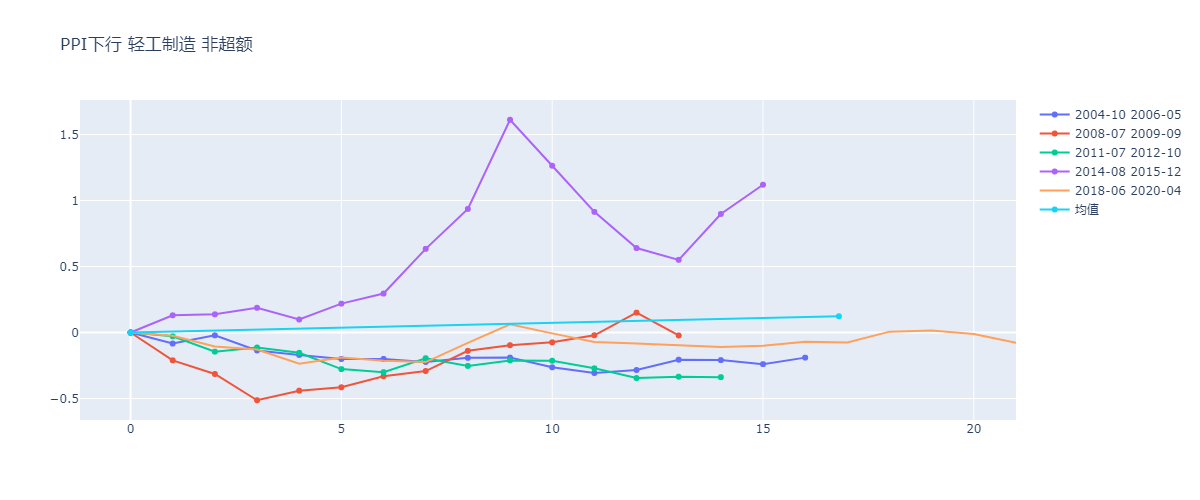

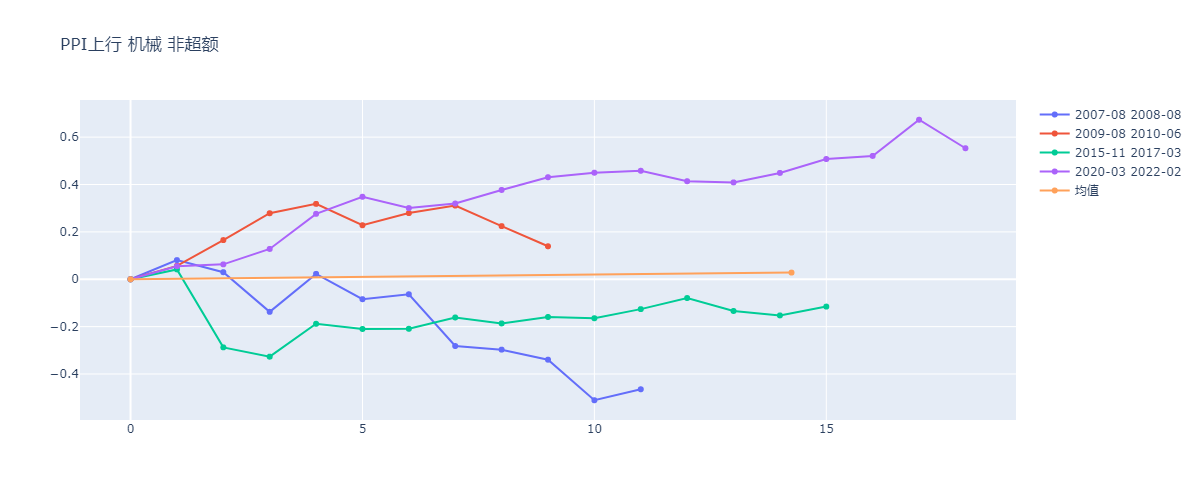

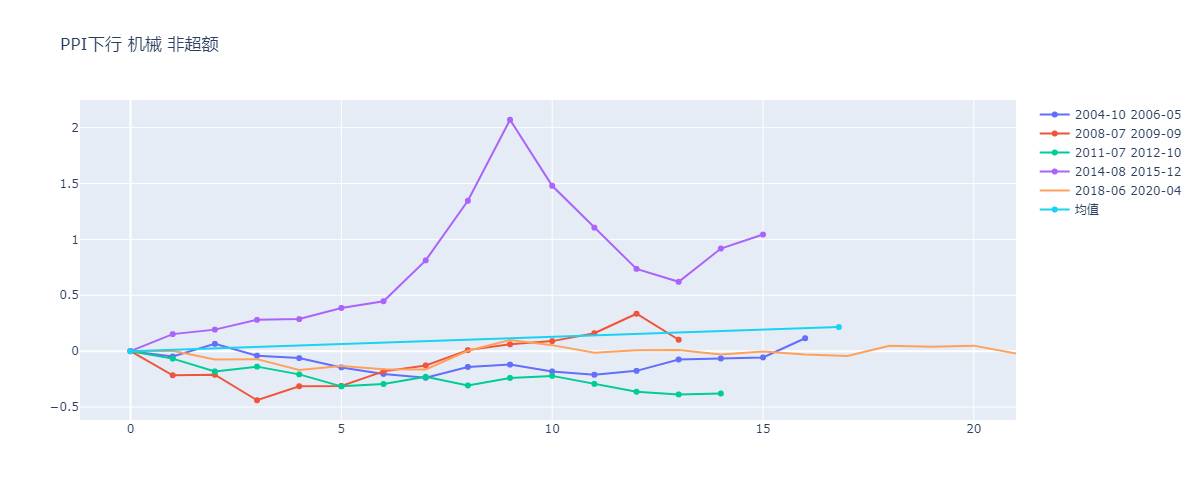

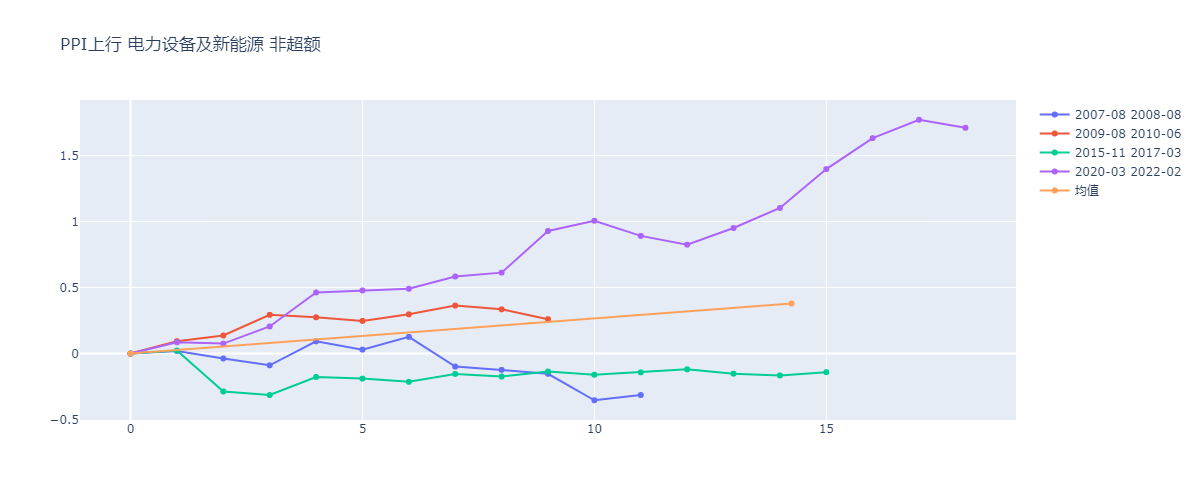

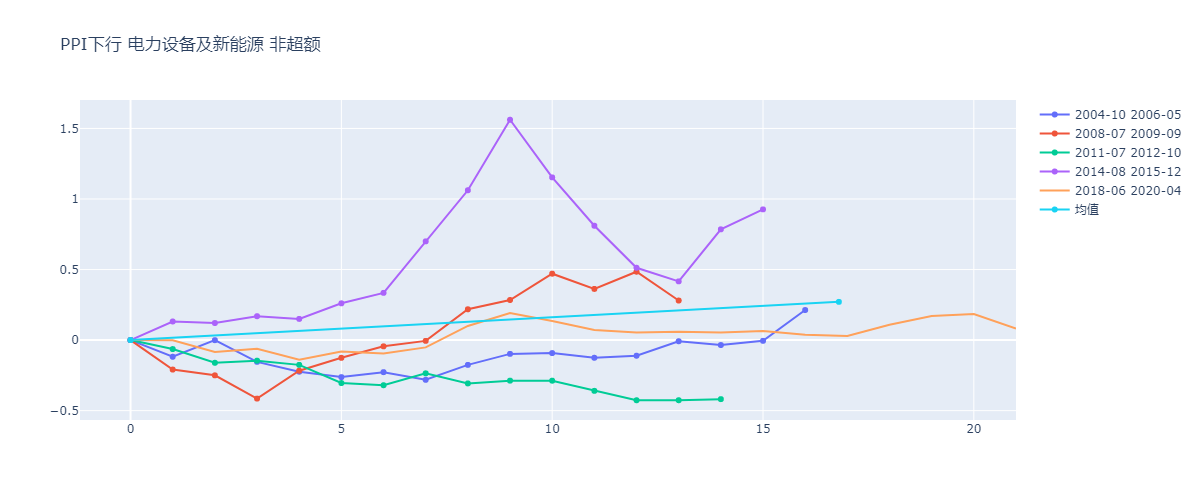

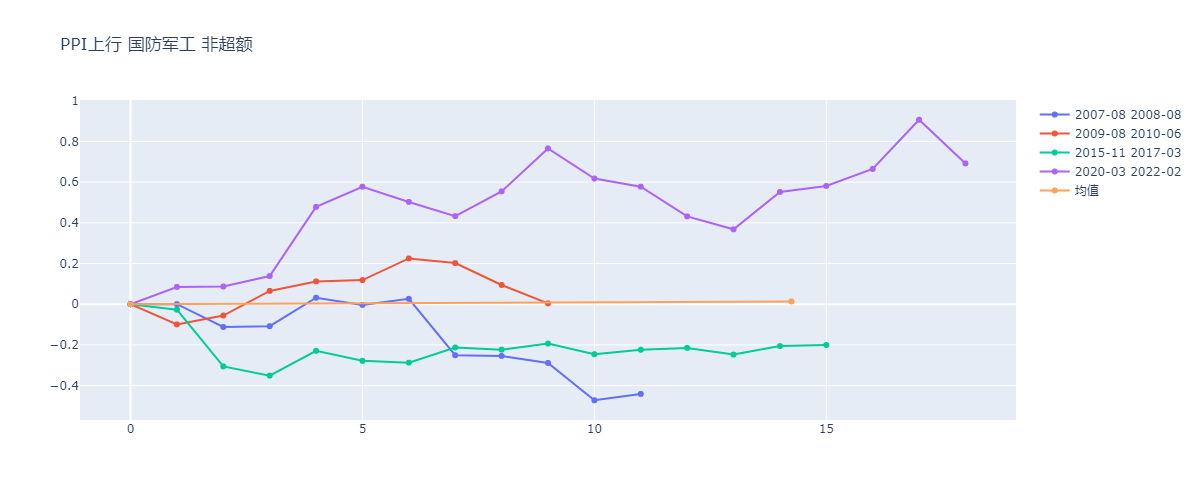

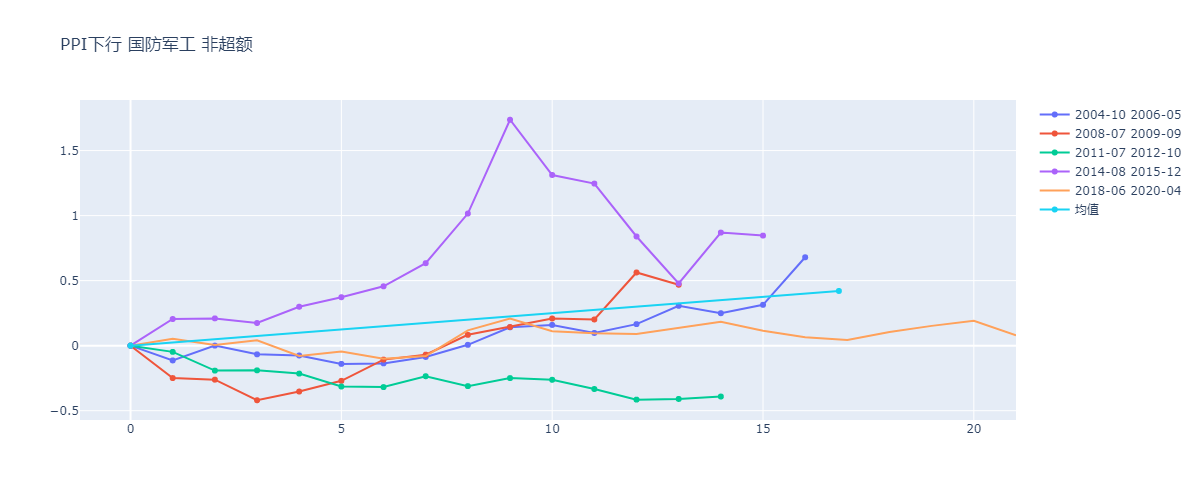

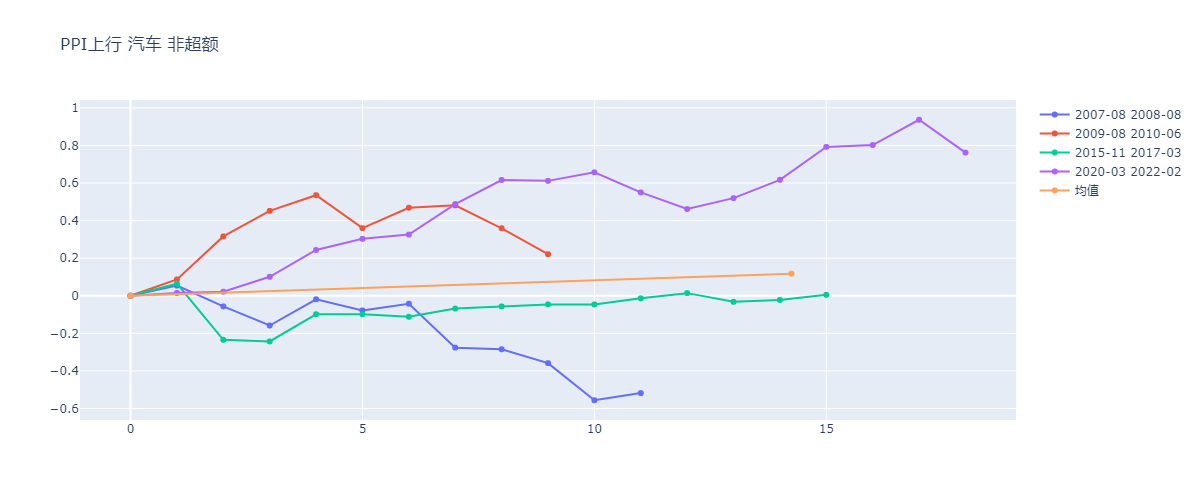

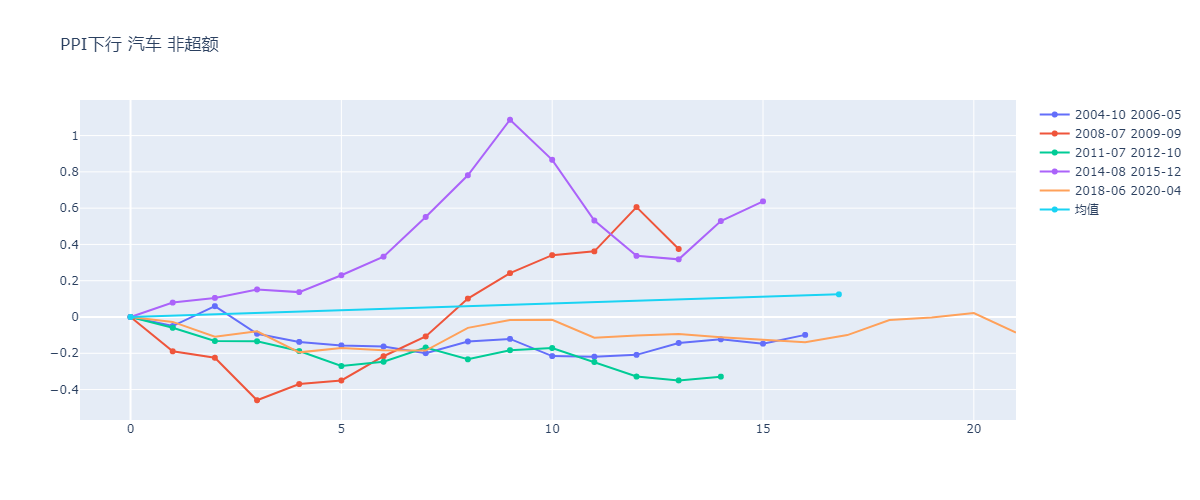

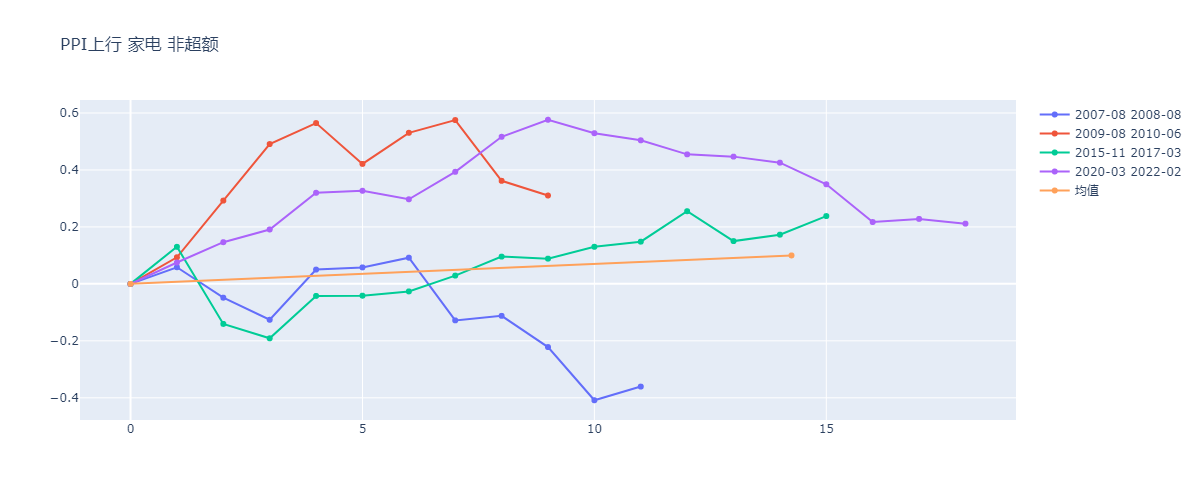

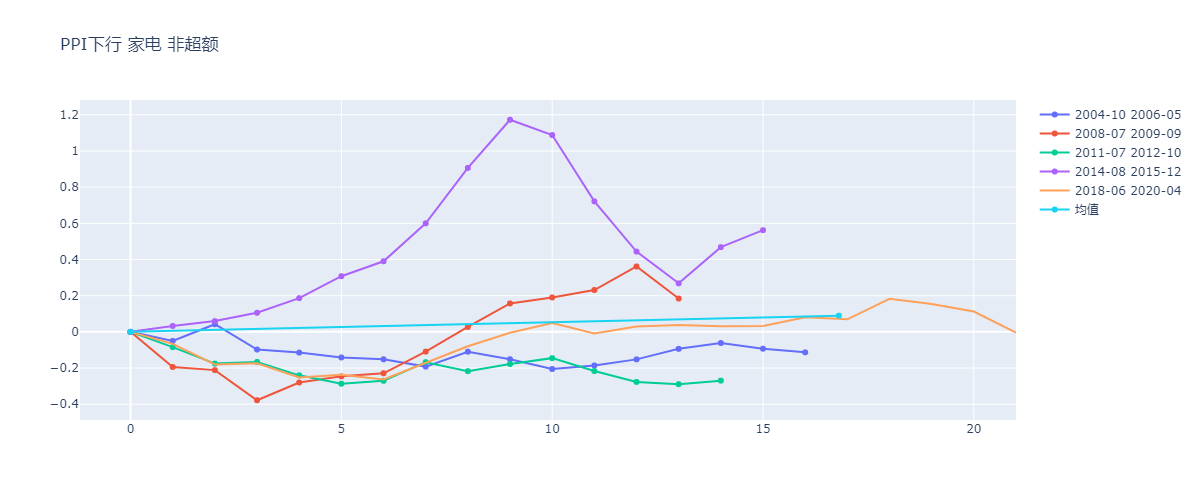

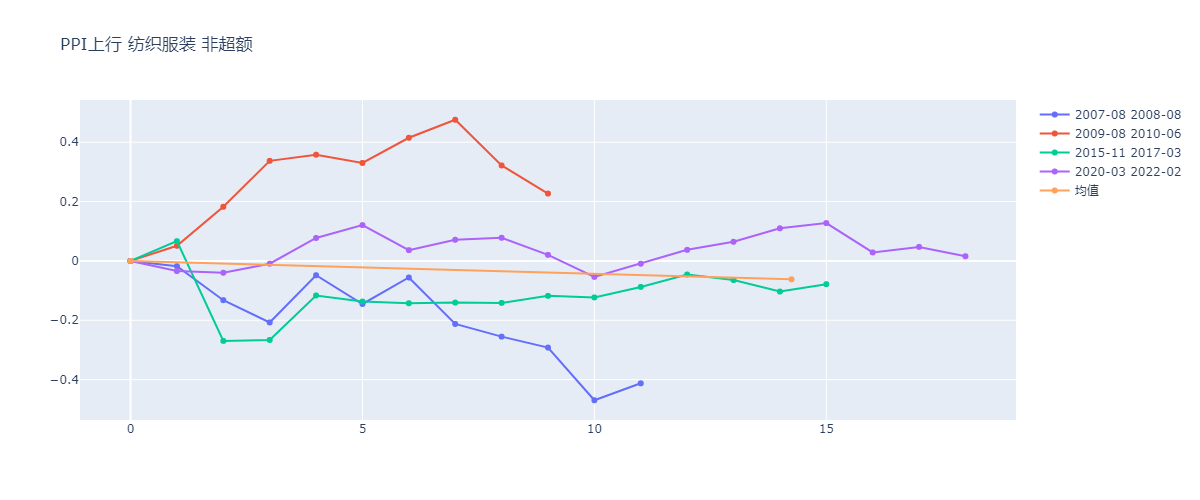

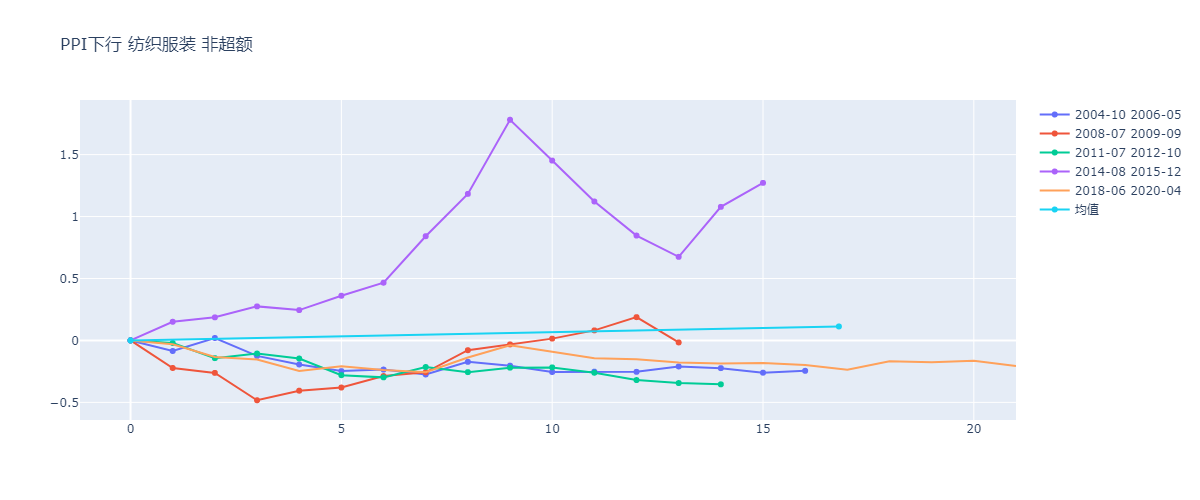

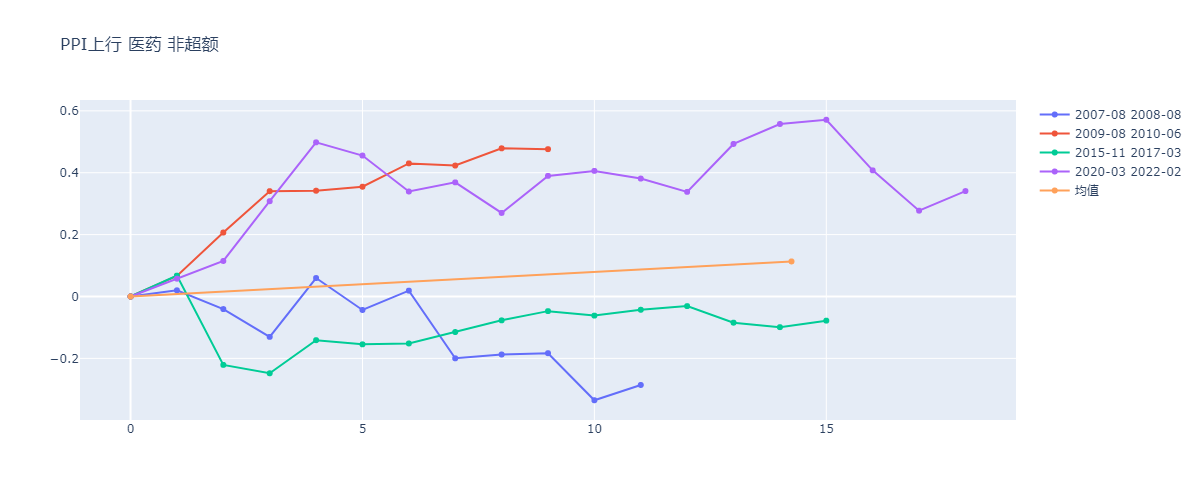

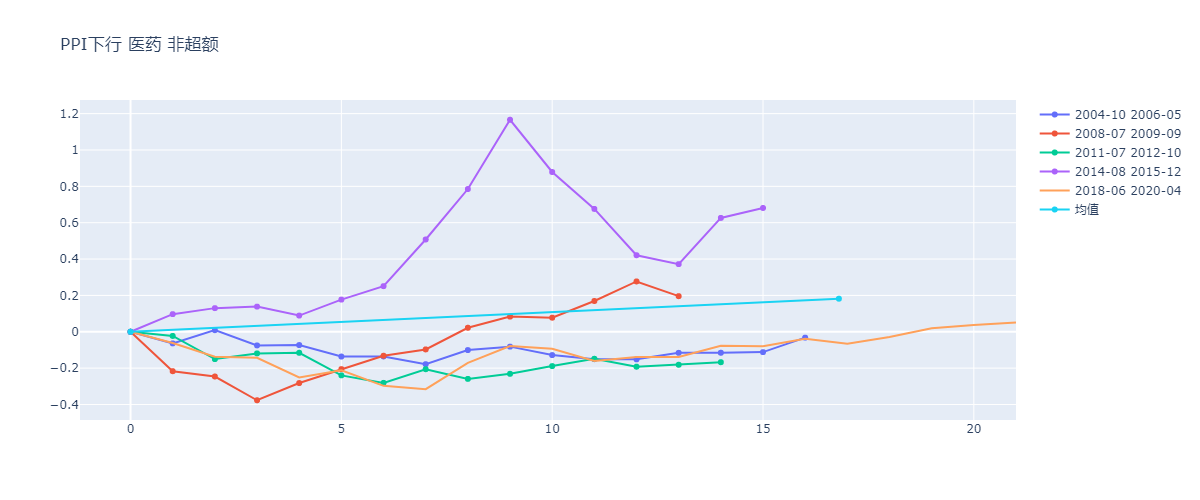

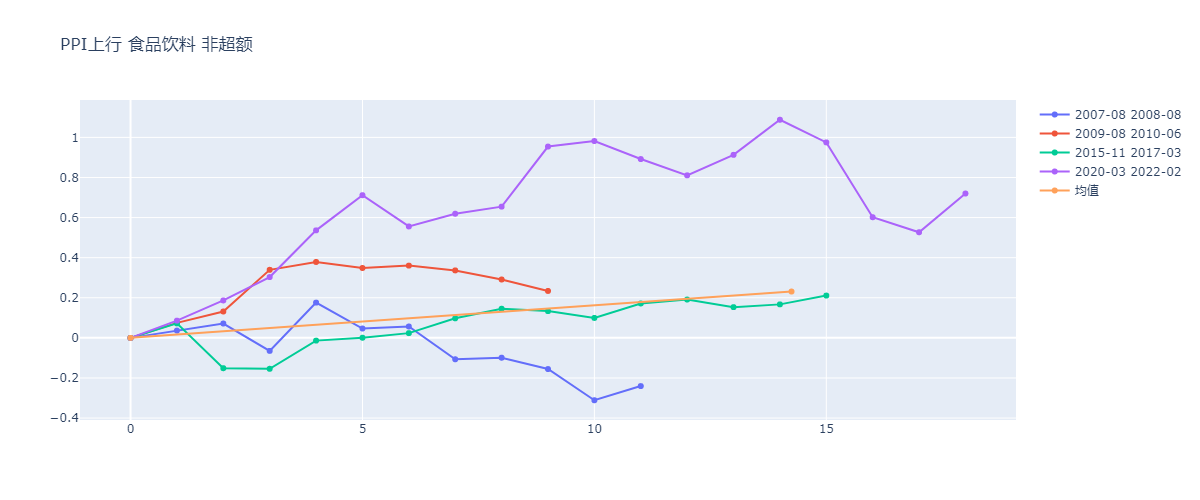

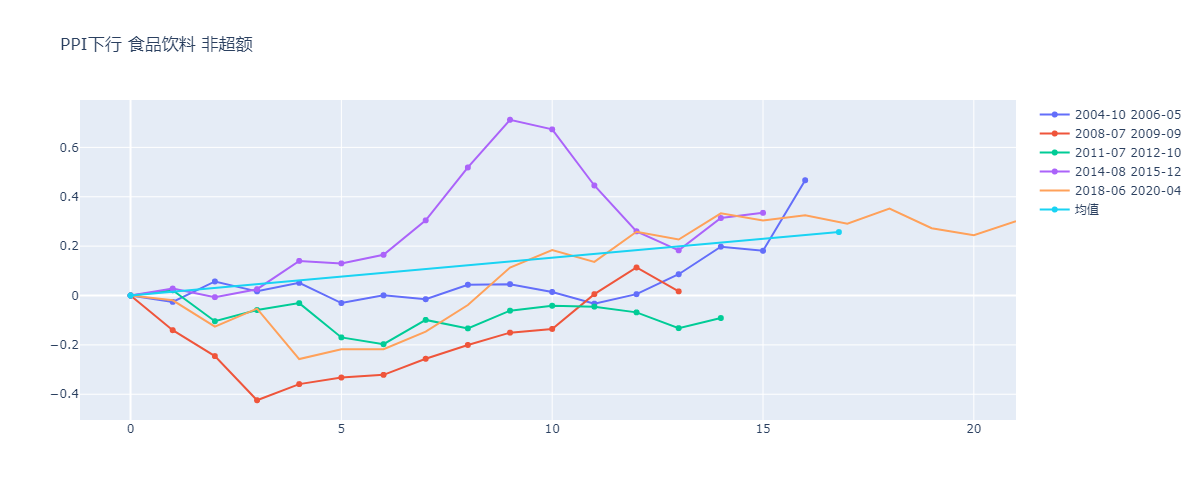

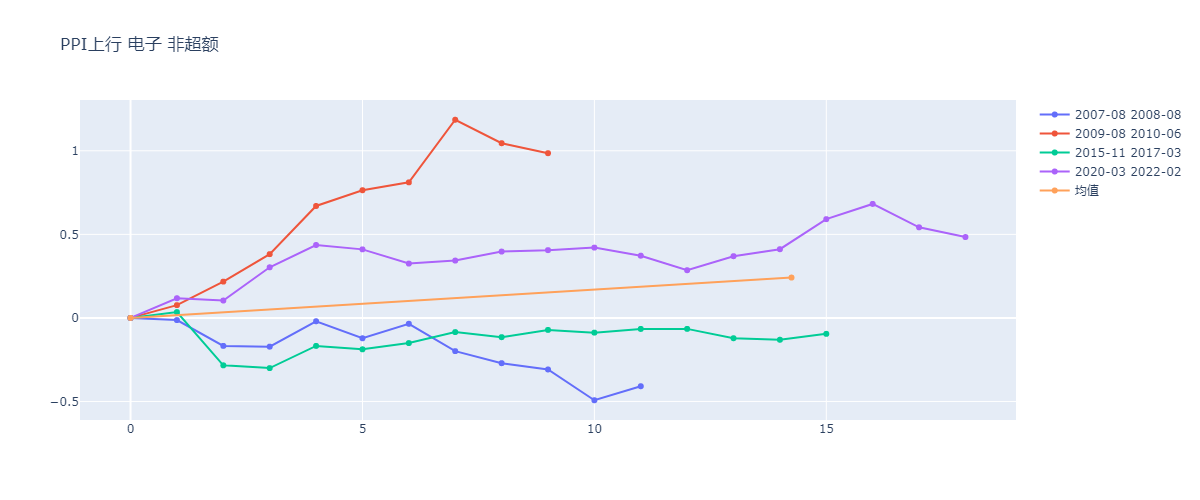

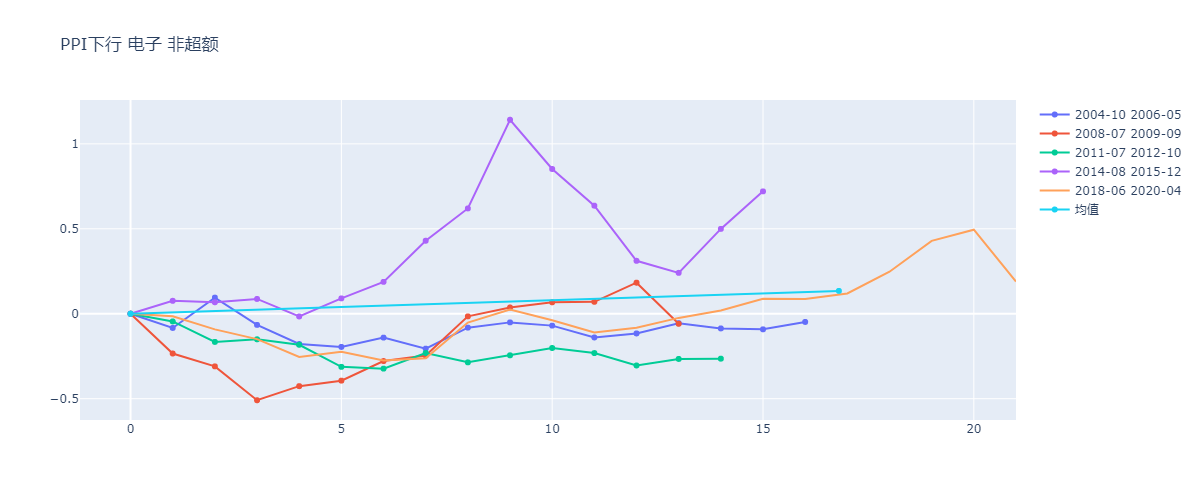

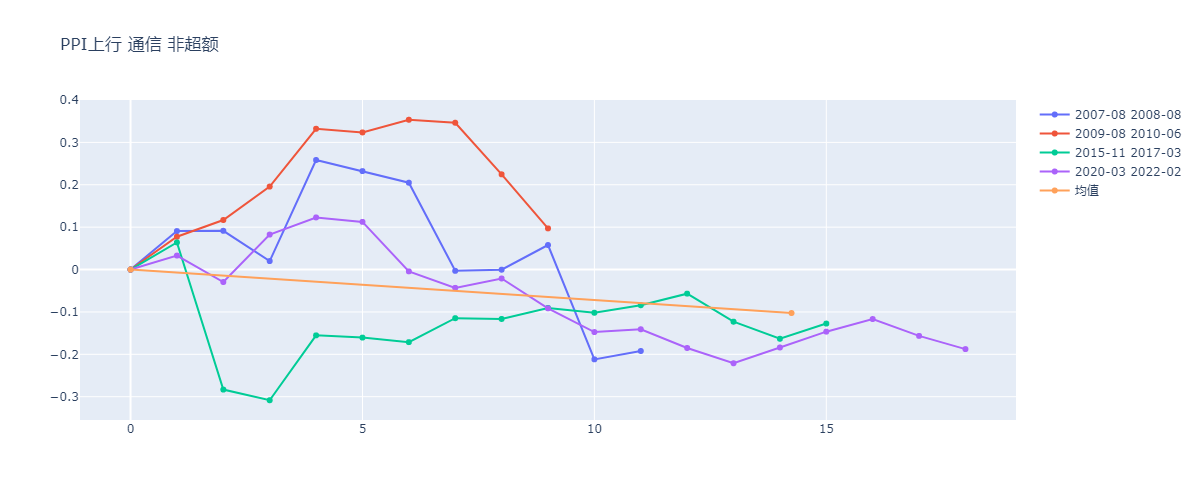

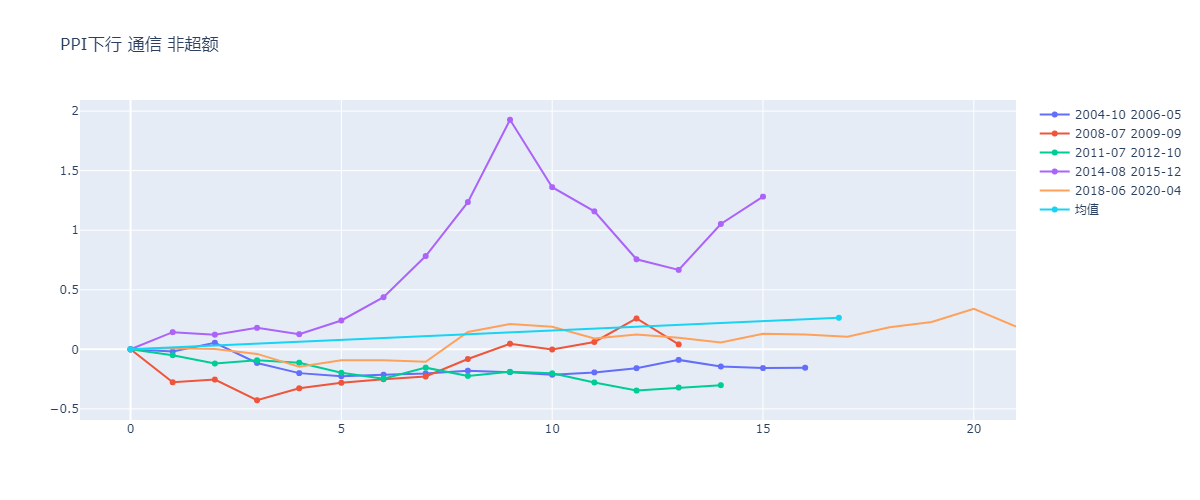

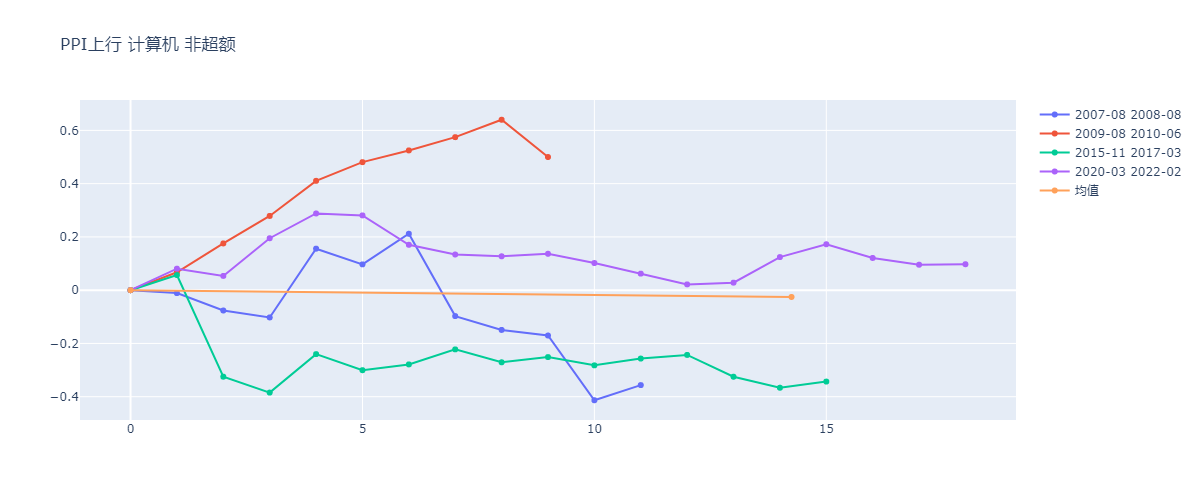

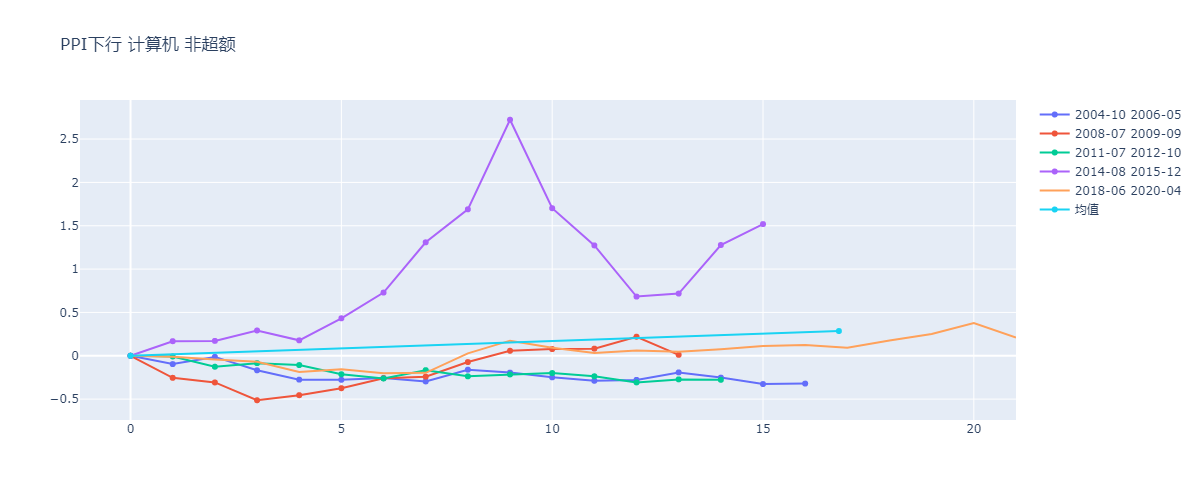

In [49]:
# 行业收益与PPI对比
for i in citic_use_cols:
    basic_compare(i, alpha=False)

### PPI相关性分析

In [74]:
# 行业超额收益与PPI数据相关系数
corr_cols = ['万得全A']
corr_cols.extend(citic_use_cols)
citic_base = citic_ind[corr_cols].pct_change()
citic_alpha = citic_base.apply(lambda x: x-citic_base['万得全A'], axis=0)

In [75]:
corr_base_ret = pd.DataFrame()
for i in [-5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5]:
    corr_base = pd.concat([ppi['全部工业'].shift(i), citic_base], axis=1).corr()
    corr_base_ret[f'提前{i}期'] = corr_base['全部工业']
corr_base_ret.drop(['全部工业'], axis=0, inplace=True)
corr_base_ret.style.background_gradient(cmap='coolwarm').set_precision(2)

In [76]:
corr_base_ret.abs().mean()

提前-5期    0.074054
提前-4期    0.094157
提前-3期    0.109167
提前-2期    0.129448
提前-1期    0.147426
提前0期     0.178528
提前1期     0.182380
提前2期     0.170124
提前3期     0.135403
提前4期     0.096722
提前5期     0.065345
dtype: float64

In [77]:
corr_alpha_ret = pd.DataFrame()
for i in [-5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5]:
    corr_alpha = pd.concat([ppi['全部工业'].shift(i), citic_alpha], axis=1).corr()
    corr_alpha_ret[f'提前{i}期'] = corr_alpha['全部工业']
corr_alpha_ret.drop(['全部工业', '万得全A'], axis=0, inplace=True)
corr_alpha_ret.style.background_gradient(cmap='coolwarm').set_precision(2)

In [78]:
corr_alpha_ret.abs().mean()

提前-5期    0.087752
提前-4期    0.080549
提前-3期    0.070628
提前-2期    0.069914
提前-1期    0.075118
提前0期     0.076700
提前1期     0.076326
提前2期     0.078359
提前3期     0.080754
提前4期     0.077966
提前5期     0.072192
dtype: float64

# 库存周期分析
>ppi = pd.read_excel('CEIC宏观数据.xlsx', sheet_name='PPI', header=0, parse_dates=True, engine='openpyxl')  
fig = px.line(ppi, x="时间", y=["工业生产者出厂价格指数", "生产资料"])  
fig.show()

In [86]:
def compare_plot(ppi_r, income_r, stock_r, inc_stk_r, ppi, income, stock, inc_stk, price1, price2, title=''):
    fig = make_subplots(specs=[[{"secondary_y": True}]])
    fig.add_trace(go.Scatter(x=ppi_r.index, y=ppi_r, showlegend=True, name='PPI(全部)', line=dict(dash='dash')), secondary_y=False)
    fig.add_trace(go.Scatter(x=income_r.index, y=income_r, showlegend=True, name='主营收入(全部)', line=dict(dash='dash')), secondary_y=False)
    fig.add_trace(go.Scatter(x=stock_r.index, y=stock_r, showlegend=True, name='产成品库存(全部)', line=dict(dash='dash')), secondary_y=False)
    fig.add_trace(go.Scatter(x=inc_stk_r.index, y=inc_stk_r, showlegend=True, name='收入-库存同比(全部)', line=dict(dash='dash')), secondary_y=False)
    # fig.add_trace(go.Scatter(x=ppi.index, y=ppi, showlegend=True, name='PPI(行业)'), secondary_y=False)
    # fig.add_trace(go.Scatter(x=income.index, y=income, showlegend=True, name='主营收入(行业)'), secondary_y=False)
    # fig.add_trace(go.Scatter(x=stock.index, y=stock, showlegend=True, name='产成品库存(行业)'), secondary_y=False)
    # fig.add_trace(go.Scatter(x=inc_stk.index, y=inc_stk, showlegend=True, name='收入-库存同比(行业)'), secondary_y=False)
    fig.add_trace(go.Scatter(x=price1.index, y=price1, showlegend=True, name='证监会二级指数'), secondary_y=True)
    fig.add_trace(go.Scatter(x=price2.index, y=price2, showlegend=True, name='中信一级指数'), secondary_y=True)

    fig.update_xaxes(title_text=title)
    fig.update_yaxes(title_text="宏观(%,同比)", secondary_y=False)
    fig.update_yaxes(title_text="指数(点数,去趋势)", secondary_y=True)
    fig.show()

In [88]:
compare_plot(ppi['全部工业'], income['全部工业'], stock['全部工业'], inc_stk['全部工业'], ppi['全部工业'], income['全部工业'],
                  stock['全部工业'], inc_stk['全部工业'], statistic_ind['万得全A'], citic_ind['万得全A'], title='总体指数')

## 上游原料

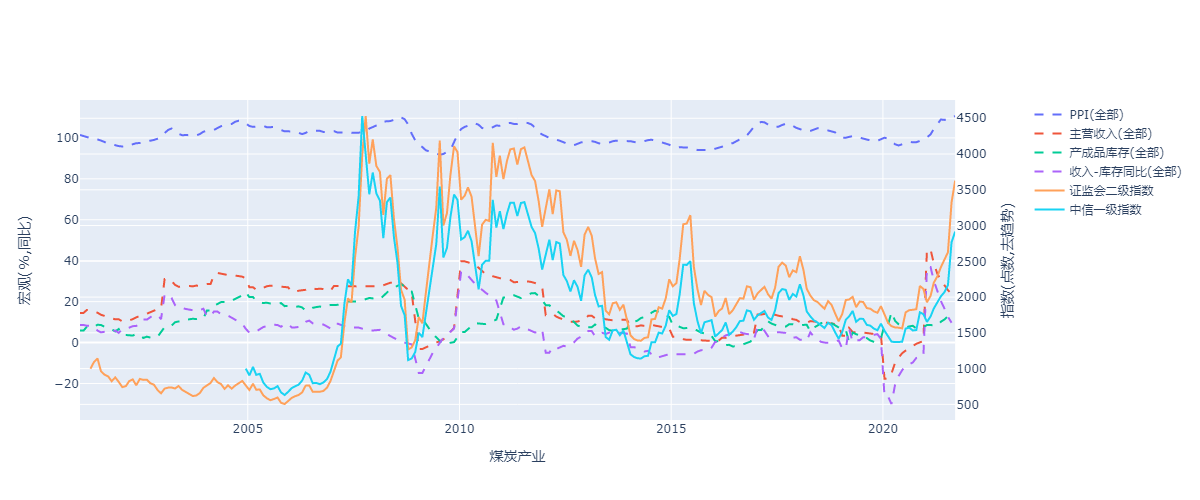

In [56]:
compare_plot(ppi['全部工业'], income['全部工业'], stock['全部工业'], inc_stk['全部工业'], ppi['煤炭开采和洗选业'], income['煤炭开采和洗选业'],
                  stock['煤炭开采和洗选业'], inc_stk['煤炭开采和洗选业'], statistic_ind['煤炭开采和洗选'], citic_ind['煤炭'], title='煤炭产业')

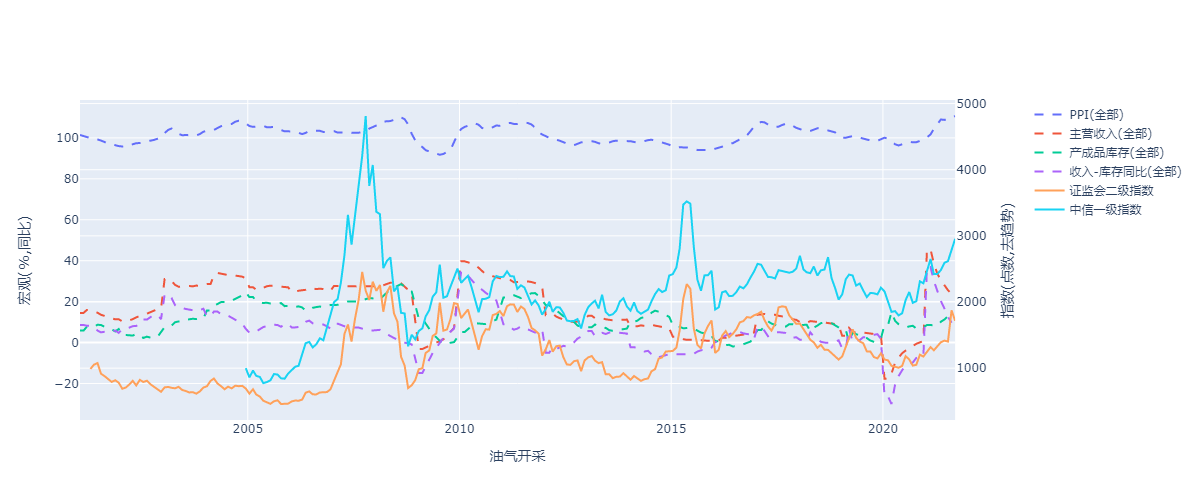

In [57]:
compare_plot(ppi['全部工业'], income['全部工业'], stock['全部工业'], inc_stk['全部工业'], ppi['石油、煤炭和其他燃料加工业'], income['石油、煤炭和其他燃料加工业'],
             stock['石油、煤炭和其他燃料加工业'], inc_stk['石油、煤炭和其他燃料加工业'], statistic_ind['石油炼焦和核燃料'],
             citic_ind['石油石化'], title='油气开采')

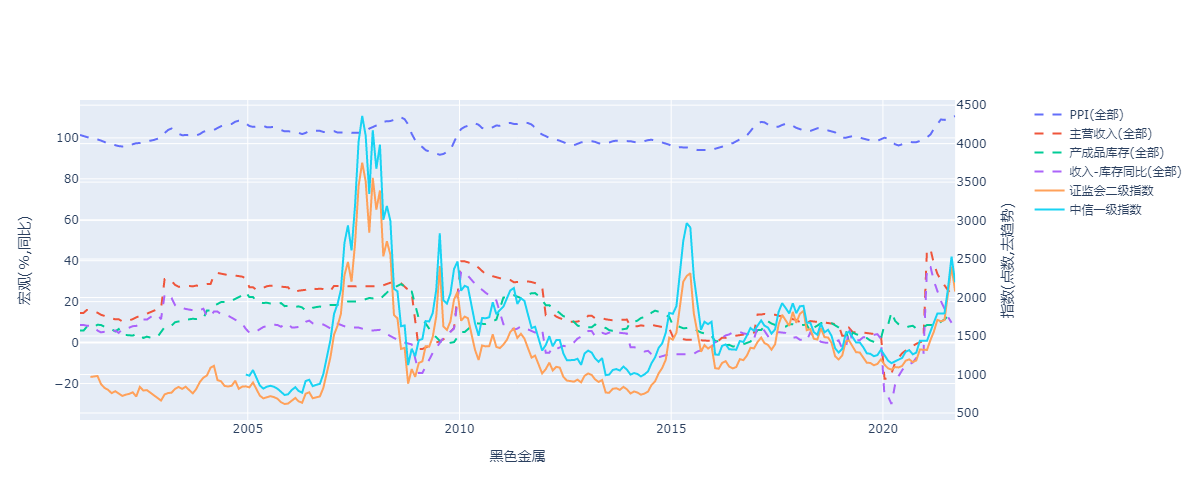

In [58]:
compare_plot(ppi['全部工业'], income['全部工业'], stock['全部工业'], inc_stk['全部工业'], ppi['黑色金属冶炼和压延加工业'], income['黑色金属冶炼和压延加工业'],
             stock['黑色金属冶炼和压延加工业'], inc_stk['黑色金属冶炼和压延加工业'], statistic_ind['黑色金属'], citic_ind['钢铁'], title='黑色金属')

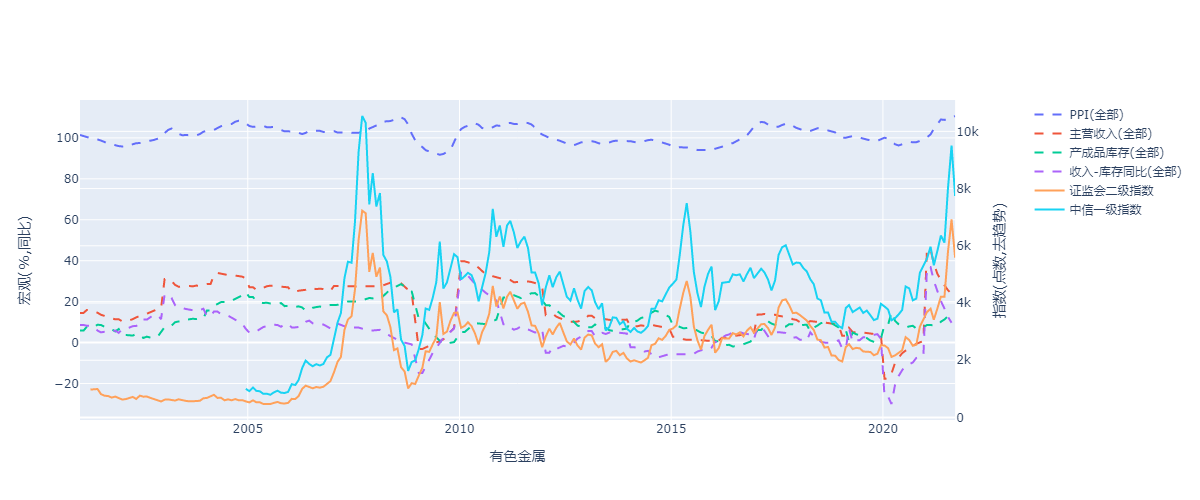

In [59]:
compare_plot(ppi['全部工业'], income['全部工业'], stock['全部工业'], inc_stk['全部工业'], ppi['有色金属冶炼和压延加工业'], income['有色金属冶炼和压延加工业'],
             stock['有色金属冶炼和压延加工业'], inc_stk['有色金属冶炼和压延加工业'], statistic_ind['有色金属'], citic_ind['有色金属'], title='有色金属')

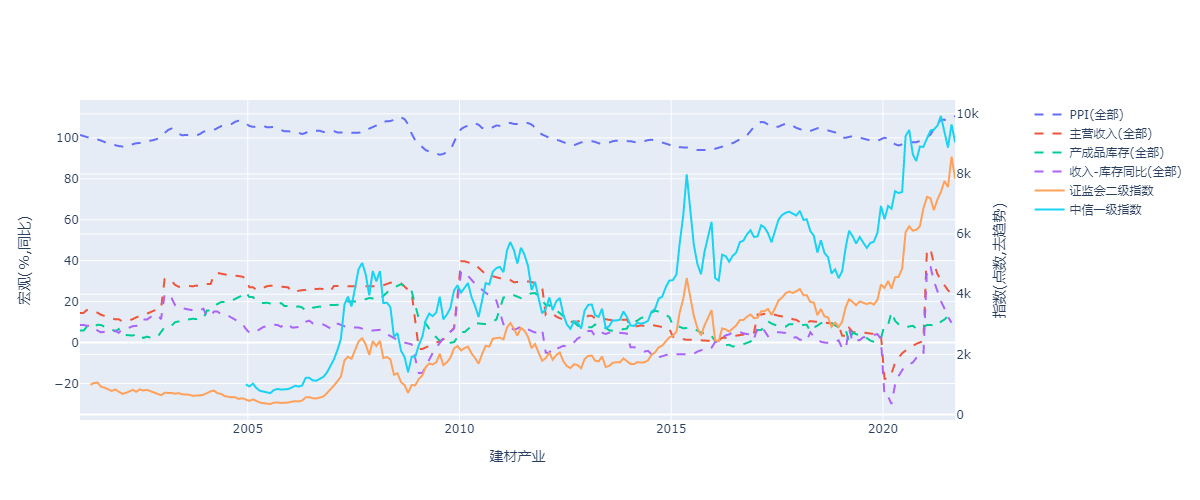

In [60]:
compare_plot(ppi['全部工业'], income['全部工业'], stock['全部工业'], inc_stk['全部工业'], ppi['非金属矿物制品业'], income['非金属矿物制品业'], stock['非金属矿物制品业'],
             inc_stk['非金属矿物制品业'], statistic_ind['非金属'], citic_ind['建材'], title='建材产业')

## 中游材料

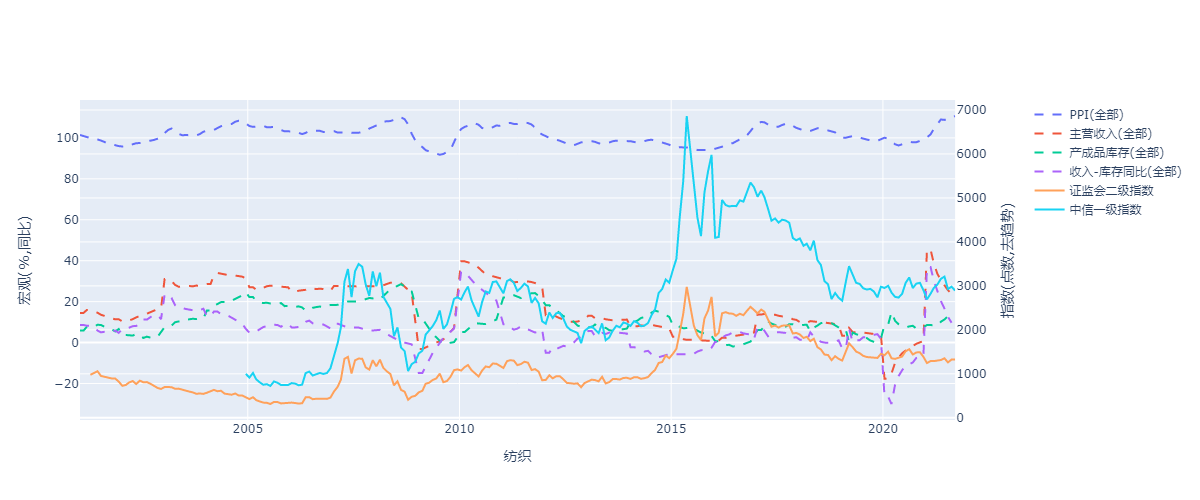

In [61]:
compare_plot(ppi['全部工业'], income['全部工业'], stock['全部工业'], inc_stk['全部工业'], ppi['纺织业'], income['纺织业'], stock['纺织业'], inc_stk['纺织业'],
             statistic_ind['纺织'], citic_ind['纺织服装'], title='纺织')

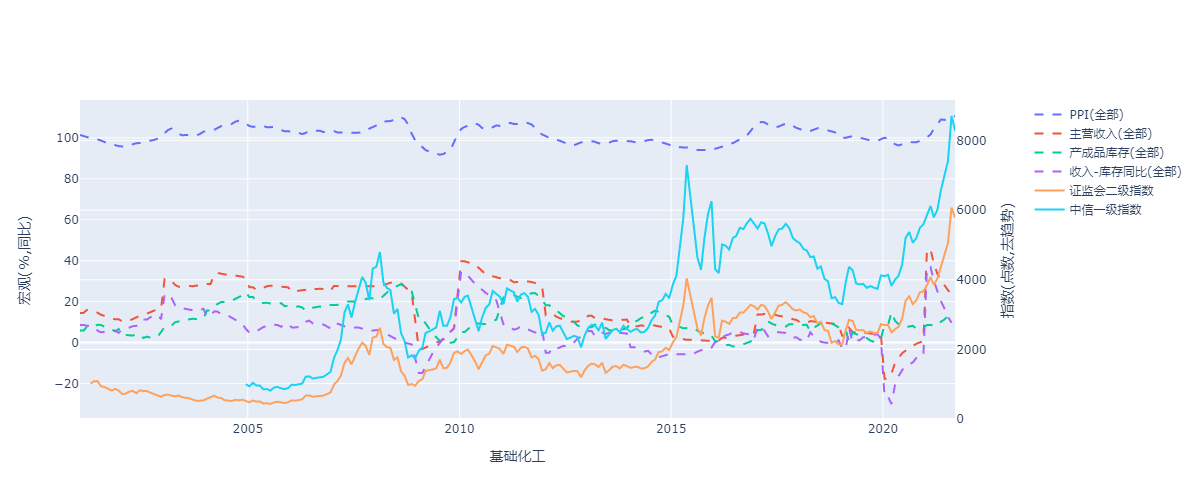

In [62]:
compare_plot(ppi['全部工业'], income['全部工业'], stock['全部工业'], inc_stk['全部工业'], ppi['化学原料和化学制品制造业'], income['化学原料和化学制品制造业'],
             stock['化学原料和化学制品制造业'], inc_stk['化学原料和化学制品制造业'], statistic_ind['化学原料和化学制品'],
             citic_ind['基础化工'], title='基础化工')

## 中游制造

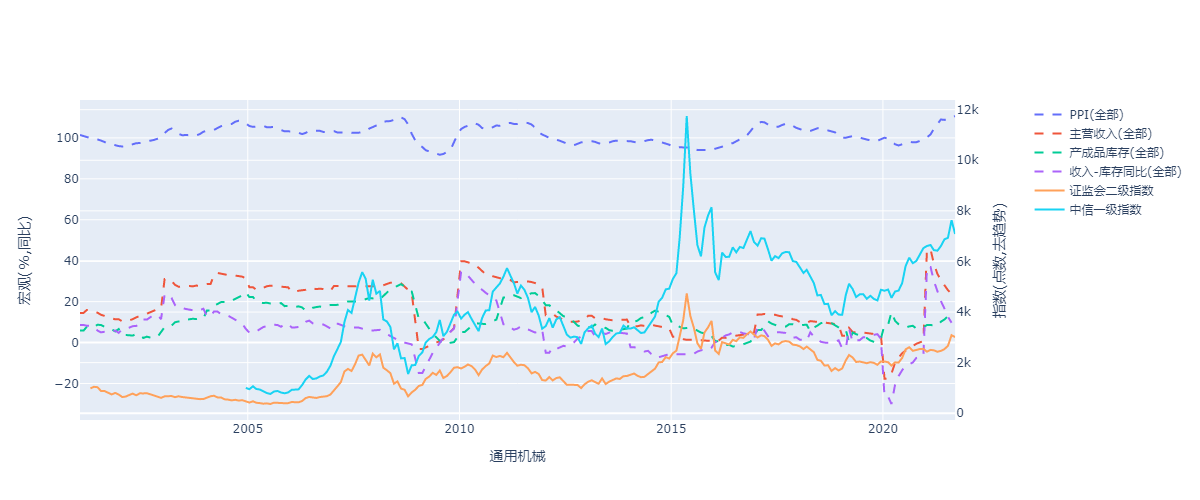

In [63]:
compare_plot(ppi['全部工业'], income['全部工业'], stock['全部工业'], inc_stk['全部工业'], ppi['通用设备制造业'], income['通用设备制造业'], stock['通用设备制造业'],
             inc_stk['通用设备制造业'], statistic_ind['通用设备'], citic_ind['机械'], title='通用机械')

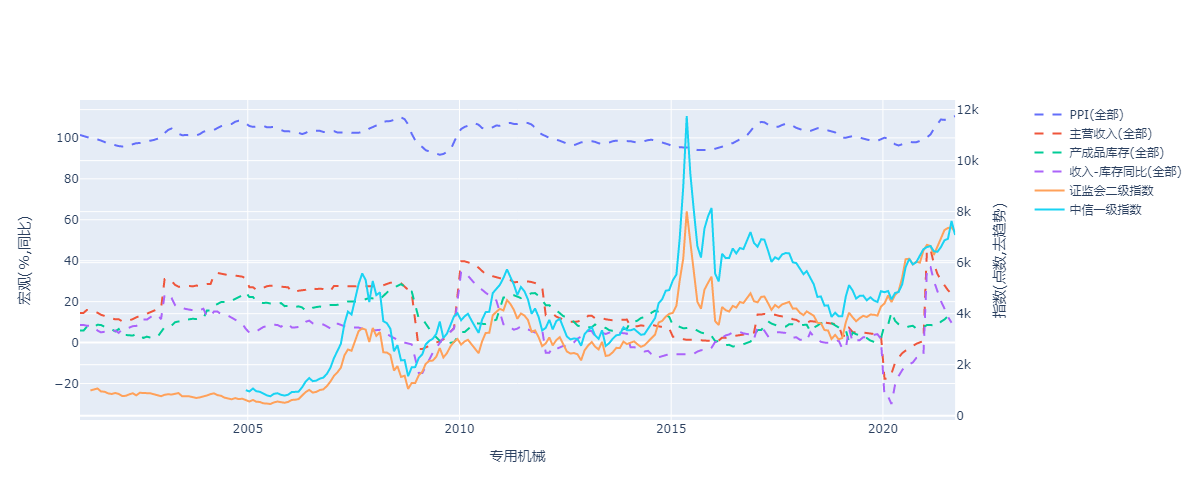

In [64]:
compare_plot(ppi['全部工业'], income['全部工业'], stock['全部工业'], inc_stk['全部工业'], ppi['专用设备制造业'], income['专用设备制造业'], stock['专用设备制造业'],
             inc_stk['专用设备制造业'], statistic_ind['专用设备'], citic_ind['机械'], title='专用机械')

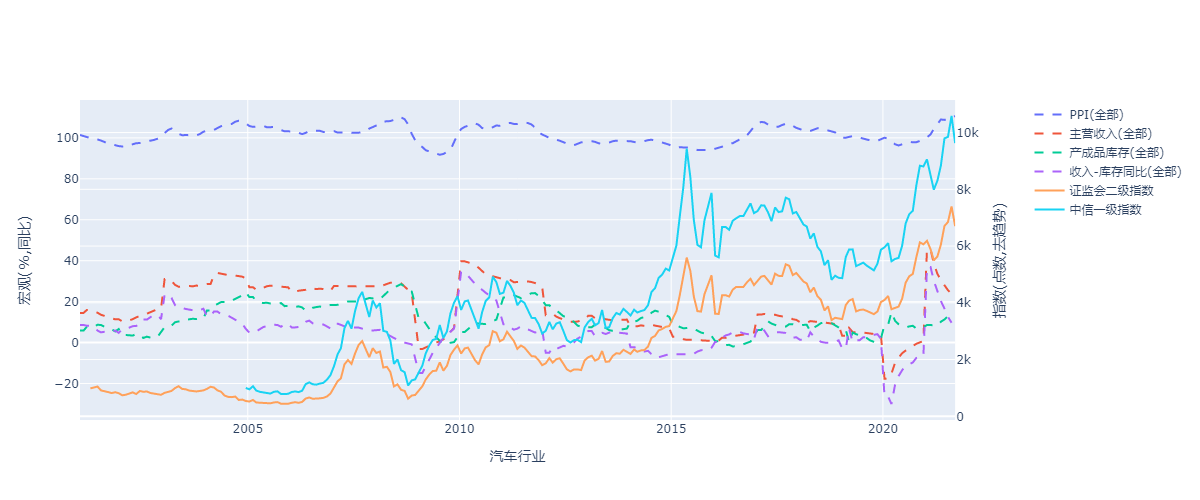

In [65]:
compare_plot(ppi['全部工业'], income['全部工业'], stock['全部工业'], inc_stk['全部工业'], ppi['汽车制造业'], income['汽车制造业'], stock['汽车制造业'],
             inc_stk['汽车制造业'], statistic_ind['汽车制造'], citic_ind['汽车'], title='汽车行业')

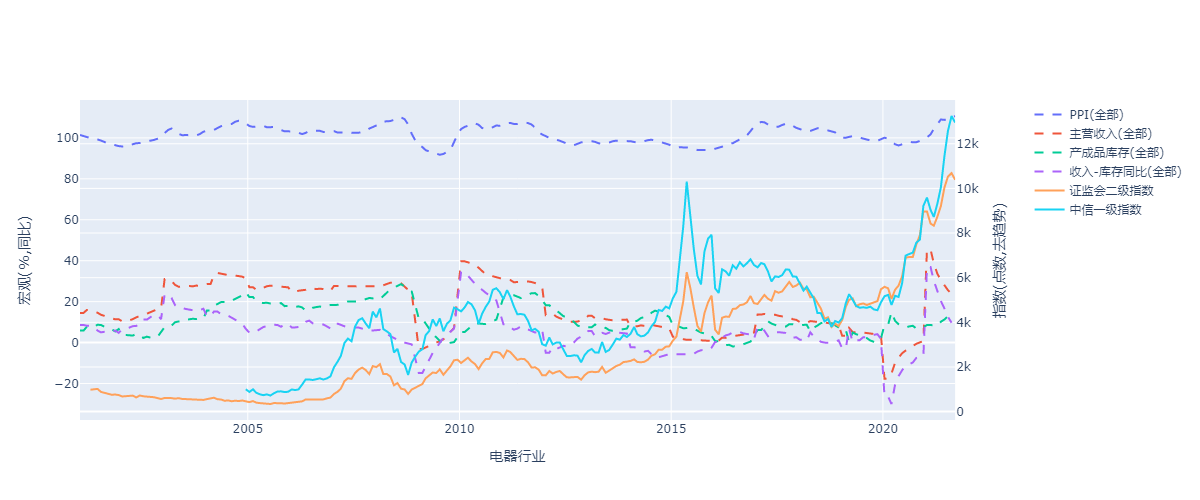

In [66]:
compare_plot(ppi['全部工业'], income['全部工业'], stock['全部工业'], inc_stk['全部工业'], ppi['电气机械和器材制造业'], income['电气机械和器材制造业'],
             stock['电气机械和器材制造业'], inc_stk['电气机械和器材制造业'], statistic_ind['电气机械和器材制造'], citic_ind['电力设备及新能源'],
             title='电器行业')

## 科技医药

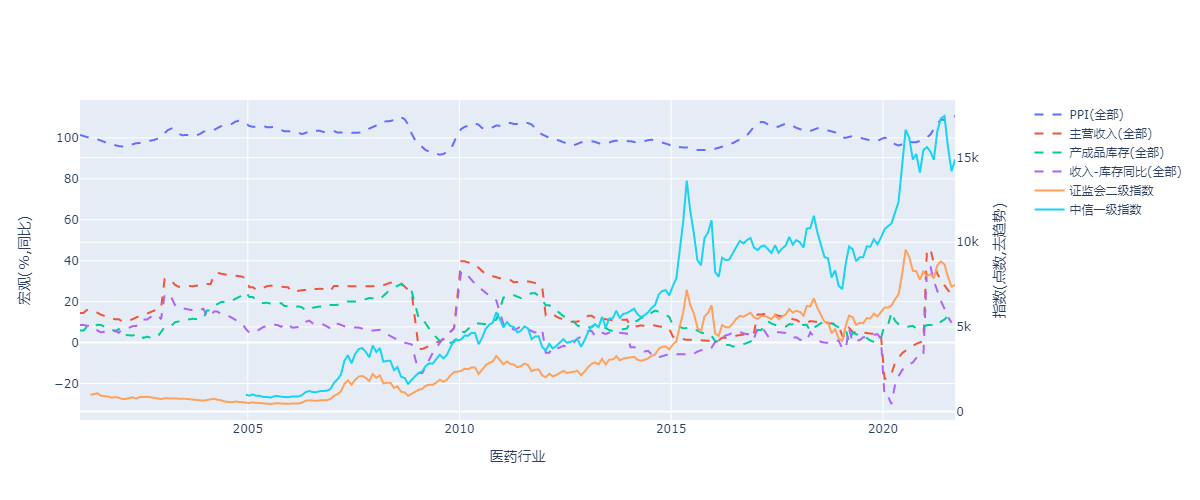

In [67]:
compare_plot(ppi['全部工业'], income['全部工业'], stock['全部工业'], inc_stk['全部工业'], ppi['医药制造业'], income['医药制造业'], stock['医药制造业'], inc_stk['医药制造业'],
             statistic_ind['医药制造'], citic_ind['医药'], title='医药行业')

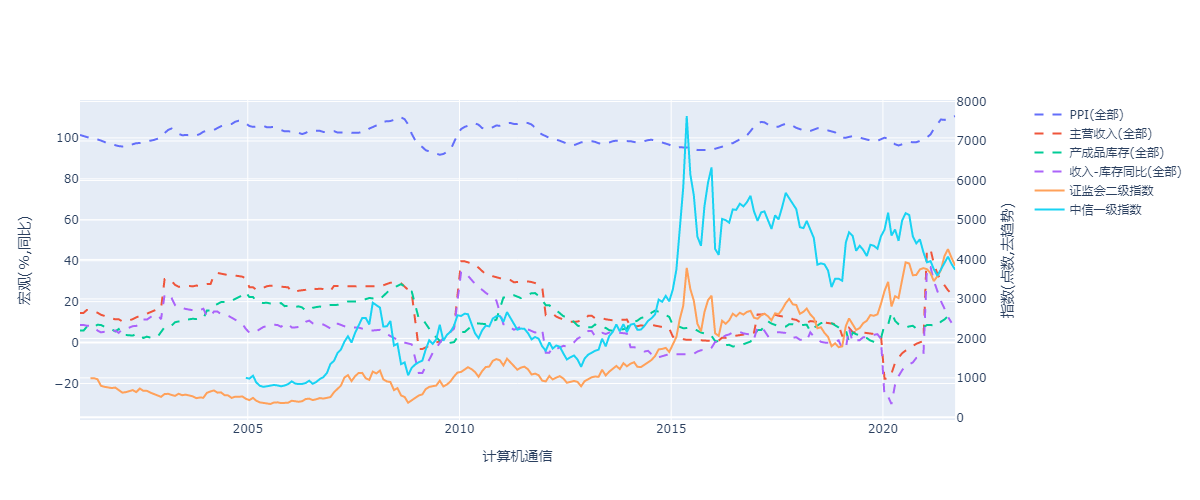

In [68]:
compare_plot(ppi['全部工业'], income['全部工业'], stock['全部工业'], inc_stk['全部工业'], ppi['计算机、通信和其他电子设备制造业'], income['计算机、通信和其他电子设备制造业'],
             stock['计算机、通信和其他电子设备制造业'], inc_stk['计算机、通信和其他电子设备制造业'], statistic_ind['计算机通信和电子设备'],
             citic_ind['通信'], title='计算机通信')

## 下游消费

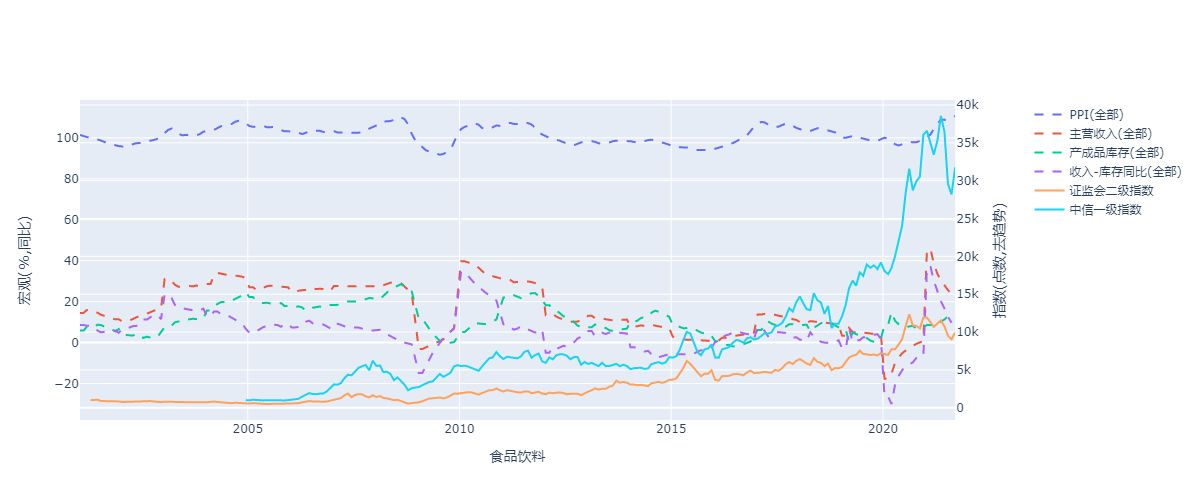

In [69]:
compare_plot(ppi['全部工业'], income['全部工业'], stock['全部工业'], inc_stk['全部工业'], ppi['食品制造业'], income['食品制造业'], stock['食品制造业'], inc_stk['食品制造业'],
             statistic_ind['食品制造'], citic_ind['食品饮料'], title='食品饮料')

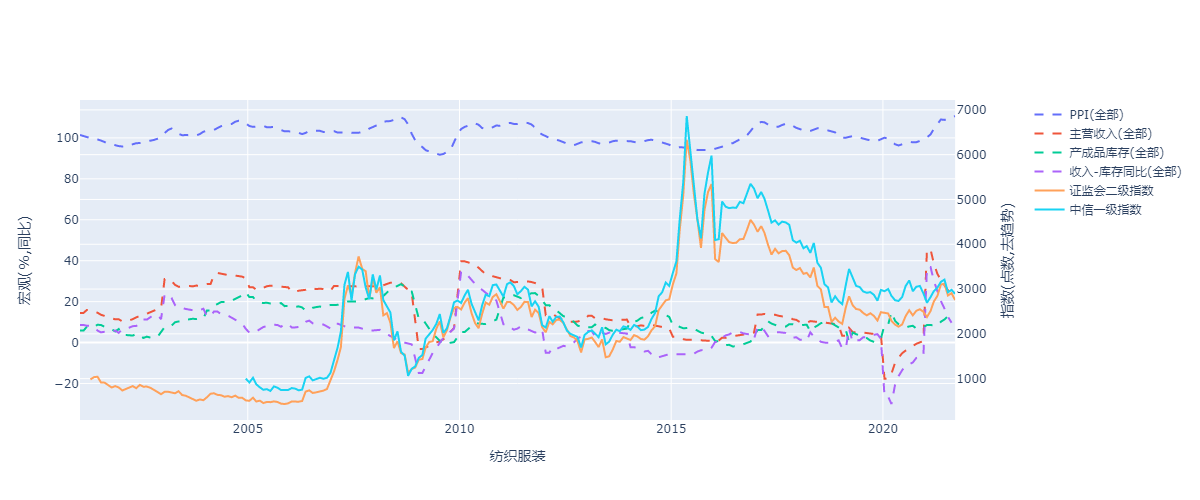

In [70]:
compare_plot(ppi['全部工业'], income['全部工业'], stock['全部工业'], inc_stk['全部工业'], ppi['纺织服装、服饰业'], income['纺织服装、服饰业'], stock['纺织服装、服饰业'],
             inc_stk['纺织服装、服饰业'], statistic_ind['纺织服装服饰'], citic_ind['纺织服装'], title='纺织服装')

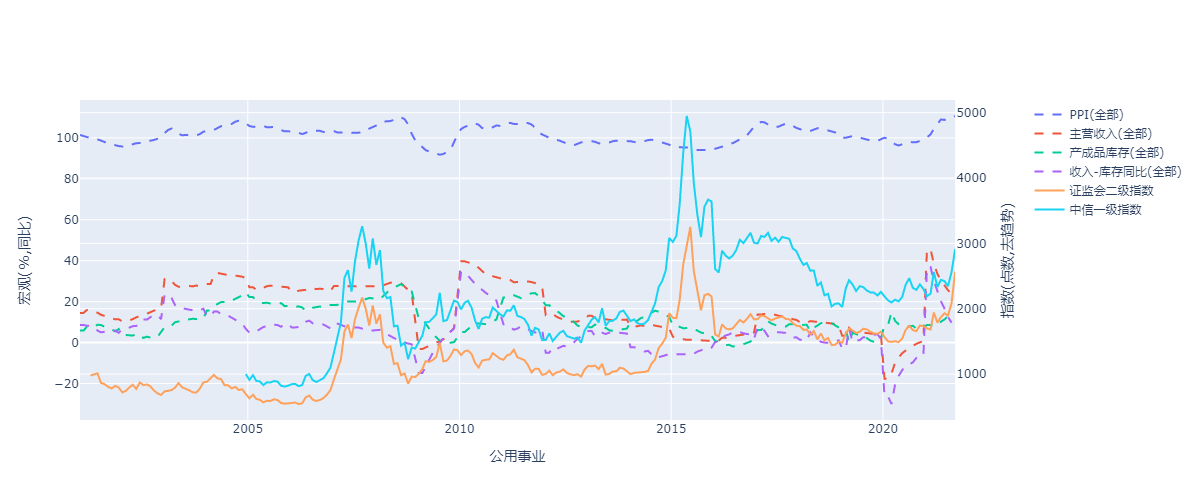

In [71]:
compare_plot(ppi['全部工业'], income['全部工业'], stock['全部工业'], inc_stk['全部工业'], ppi['电力、热力生产和供应业'], income['电力、热力生产和供应业'],
             stock['电力、热力生产和供应业'], inc_stk['电力、热力生产和供应业'], statistic_ind['电热生产供应'], citic_ind['电力及公用事业'],
             title='公用事业')

In [73]:
!jupyter nbconvert --no-input --output-dir="../output" --to html C:\Users\rbsli\PycharmProjects\gist\stock_study.ipynb

[NbConvertApp] Converting notebook C:\Users\rbsli\PycharmProjects\gist\stock_study.ipynb to html
[NbConvertApp] Writing 9143193 bytes to ..\output\stock_study.html
